# **Problem statement**

Consider the given dataset and apply various Data Preprocessing steps to make it fit for applying machine learning algorithms.

[ *Hint: Data Preprocessing, Feature Encoding, Feature Engineering, Feature Binning, Feature Scaling, Feature Selection, Dimensionality Reduction, Data Visualization Techniques, Outlier Detection, Outlier Handling, Class Imbalance* ]

1. Prepare a neat documentation, expressing each and every step with reason. Also, specify the corresponding code and its outcome.
2. Final dataset should be an efficient one and all the features should be of either “Int” or “Float” data type
3. Mention the target feature.

**Links to datasets -** 
1. LCDataDictionary 1.csv - https://gist.githubusercontent.com/ankit-rawani/e515390a20cb9ec3ce5a804ffed47f0e/raw/e47992c0b8f69a324695bcf3e3e05d54dce3ec9d/LCDataDictionary%25201.csv

2. lending-club-loans.csv - https://gist.githubusercontent.com/ankit-rawani/e515390a20cb9ec3ce5a804ffed47f0e/raw/e47992c0b8f69a324695bcf3e3e05d54dce3ec9d/lending-club-loans.csv

**IMPORTANT** \\
Run the cells individually and read the texts given as well. Don't run all cells at once.

# **Importing necessary modules**

In [ ]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from urllib.request import Request, urlopen
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from collections import Counter
from imblearn.over_sampling import SMOTE,RandomOverSampler

# **Importing dataset and dictionary**

In [ ]:
lending_club_loans_url = "https://gist.githubusercontent.com/ankit-rawani/e515390a20cb9ec3ce5a804ffed47f0e/raw/e47992c0b8f69a324695bcf3e3e05d54dce3ec9d/lending-club-loans.csv"
lc_data_dictionary_url = "https://gist.githubusercontent.com/ankit-rawani/e515390a20cb9ec3ce5a804ffed47f0e/raw/e47992c0b8f69a324695bcf3e3e05d54dce3ec9d/LCDataDictionary%25201.csv"

lending_club_loans_dataset = pd.read_csv(urlopen(Request(lending_club_loans_url)), low_memory=False)
lc_data_dictionary = pd.read_csv(urlopen(Request(lc_data_dictionary_url)), low_memory=False)

In [ ]:
lending_club_loans_dataset.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,0.837,9.0,False,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,0.094,4.0,False,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,False,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,0.985,10.0,False,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,0.210,37.0,False,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,695.0,699.0,0.0,38.0,NaN,15.0,0.0,27783.0,0.539,38.0,False,270.78,270.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN


In [ ]:
lc_data_dictionary

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


# **Data Preprocessing**

## **Handling duplicate values**

Let's check if there are duplicate values in the ID column of the dataset

In [ ]:
any(lending_club_loans_dataset['id'].duplicated())

True

There are duplicate values in the dataset. So, we'll drop the rows with duplicate IDs.

In [ ]:
lending_club_loans_dataset = lending_club_loans_dataset.drop_duplicates(subset=['id'], keep='first')

## **Handling NULL values**

Checking the number of null values in columns and rows

In [ ]:
lending_club_loans_dataset.isnull().sum(axis=0) # columns

id                                0
member_id                         3
loan_amnt                         3
funded_amnt                       3
funded_amnt_inv                   3
                              ...  
tax_liens                       108
tot_hi_cred_lim               42538
total_bal_ex_mort             42538
total_bc_limit                42538
total_il_high_credit_limit    42538
Length: 115, dtype: int64

In [ ]:
lending_club_loans_dataset.isnull().sum(axis=1) # rows

0         58
1         57
2         59
3         56
4         55
        ... 
42534     70
42535     71
42550     69
42551    114
42552    114
Length: 42538, dtype: int64

NULL values exist in the dataset. So, we'll drop the columns which have more than half the values as NULL.

In [ ]:
lending_club_loans_dataset = lending_club_loans_dataset.dropna(thresh=len(lending_club_loans_dataset)/2, axis=1)

## **Dropping redundant columns**

In [ ]:
lending_club_loans_dataset.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [ ]:
lending_club_loans_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,735.0,739.0,1.0,3.0,0.0,13648.0,0.837,9.0,False,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,Sep-16,744.0,740.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,740.0,744.0,5.0,3.0,0.0,1687.0,0.094,4.0,False,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-16,499.0,0.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,False,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,735.0,739.0,2.0,2.0,0.0,2956.0,0.985,10.0,False,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,Sep-16,719.0,715.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,690.0,694.0,1.0,10.0,0.0,5598.0,0.210,37.0,False,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,604.0,600.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,695.0,699.0,0.0,15.0,0.0,27783.0,0.539,38.0,False,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0.00,Sep-16,67.79,Sep-16,694.0,690.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False


As we can see above, many of the columns are not useful for our purpose, so we can drop those as well.

In [ ]:
useless_columns = ['member_id', 'emp_title', 'emp_length', 'issue_d', 'url', 'desc', 'purpose', 'title', 'zip_code', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt', 'earliest_cr_line', 'last_credit_pull_d']
lending_club_loans_dataset = lending_club_loans_dataset.drop(useless_columns, axis=1)

## **Fixing the datatypes**

In [ ]:
lending_club_loans_dataset.dtypes

id                             object
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
pymnt_plan                     object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
last_fico_ra

As we can see, the id column doesn't have correct datatype.

In [ ]:
#lending_club_loans_dataset['id'] = lending_club_loans_dataset['id'].astype('int')

We're getting an error while running the above code. From the error description, we can infer that ID column contains some strings as well. So we need to drop those rows to convert the datatype of ID column.

In [ ]:
# utility function to check if a string can be parsed to integer or not
def is_int(num):
  try:
    int(num)
    return True

  except:
    return False

In [ ]:
# dropping the rows where ID is not integer
lending_club_loans_dataset = lending_club_loans_dataset[lending_club_loans_dataset['id'].apply(is_int)]

Now, run that cell again where we were getting error earlier. We're not getting any error now.

In [ ]:
lending_club_loans_dataset.dtypes

id                             object
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
pymnt_plan                     object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
last_fico_ra

The datatypes has been fixed as well.

## **Dropping columns with less number of unique values**

In [ ]:
for column in lending_club_loans_dataset.columns:
  if(len(lending_club_loans_dataset[column].unique()) < 5):
    lending_club_loans_dataset = lending_club_loans_dataset.drop(column, axis=1)

## **Handling missing values in rows**

Now to handle missing values in row, we'll replace the NULL values with appropriate central tendency.

In [ ]:
lending_club_loans_dataset.dtypes

id                       object
loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
int_rate                 object
installment             float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
loan_status              object
addr_state               object
dti                     float64
delinq_2yrs             float64
fico_range_low          float64
fico_range_high         float64
inq_last_6mths          float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
last_fico_range_high    float64
last_fico_range_low     float64
dtype: object

Now, here we have two datatypes for the columns other than ID. We can replace the null values in columns with datatype float64 with the mean value and for the columns with object datatype with the mode.

In [ ]:
float_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'last_fico_range_high', 'last_fico_range_low']
object_columns = ['int_rate', 'grade', 'sub_grade', 'home_ownership', 'loan_status', 'addr_state']

for col in float_columns:
  lending_club_loans_dataset[col].fillna(lending_club_loans_dataset[col].mean(), inplace=True)

for col in object_columns:
  lending_club_loans_dataset[col].fillna(lending_club_loans_dataset[col].mode(), inplace=True)

In [ ]:
lending_club_loans_dataset.isnull().sum(axis=0)

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
loan_status             0
addr_state              0
dti                     0
delinq_2yrs             0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
last_fico_range_high    0
last_fico_range_low     0
dtype: int64

# **Data Visualization**

#### Loan amount distribution

Text(0.5, 1.0, 'Distribution of Loan Amounts')

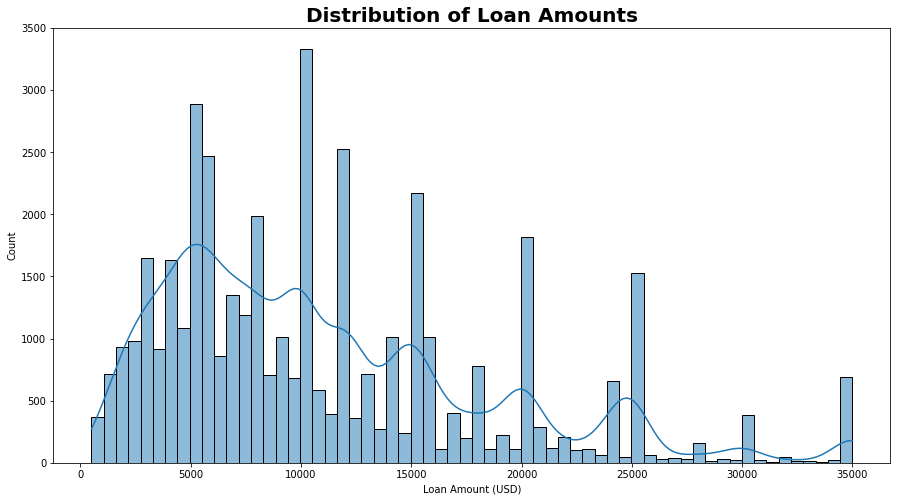

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(lending_club_loans_dataset['loan_amnt'], kde=True)
plt.xlabel('Loan Amount (USD)')
plt.ylabel('Count')
plt.title('Distribution of Loan Amounts', fontsize = 20, weight='bold')

#### Loan amount distribution according to status

Text(0.5, 1.0, 'Distribution of Loan Amounts by Loan Status')

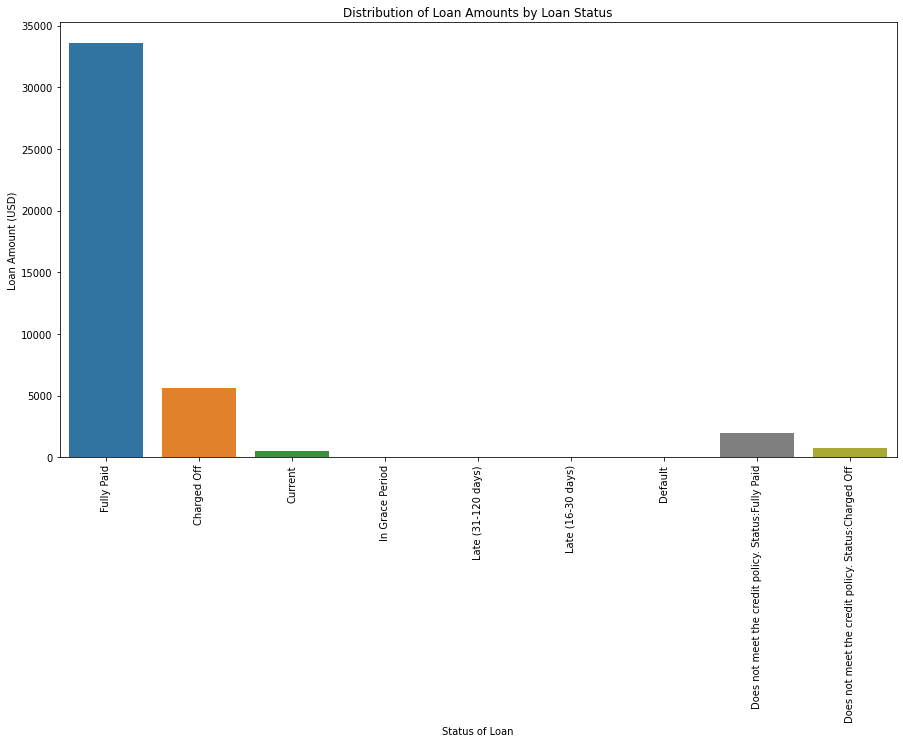

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=lending_club_loans_dataset, x=lending_club_loans_dataset.loan_status)
plt.xticks(rotation=90)
plt.xlabel('Status of Loan')
plt.ylabel('Loan Amount (USD)')
plt.title('Distribution of Loan Amounts by Loan Status')

Most of the Loans are either `Fully Paid` or `Charged off`. Lets visualize them for better understanding

In [ ]:
selected_loan_status = ['Fully Paid', 'Charged Off']
lending_club_loans_dataset_copy = lending_club_loans_dataset[lending_club_loans_dataset.loan_status.isin(selected_loan_status)]              # creating a copy of dataset with fewer loan status
lending_club_loans_dataset_copy['int_rate'].replace('\%', '', regex=True, inplace=True)
lending_club_loans_dataset_copy['int_rate'] = lending_club_loans_dataset_copy['int_rate'].astype('float')



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### Interest rate distribution

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]), <a list of 10 Text major ticklabel objects>)

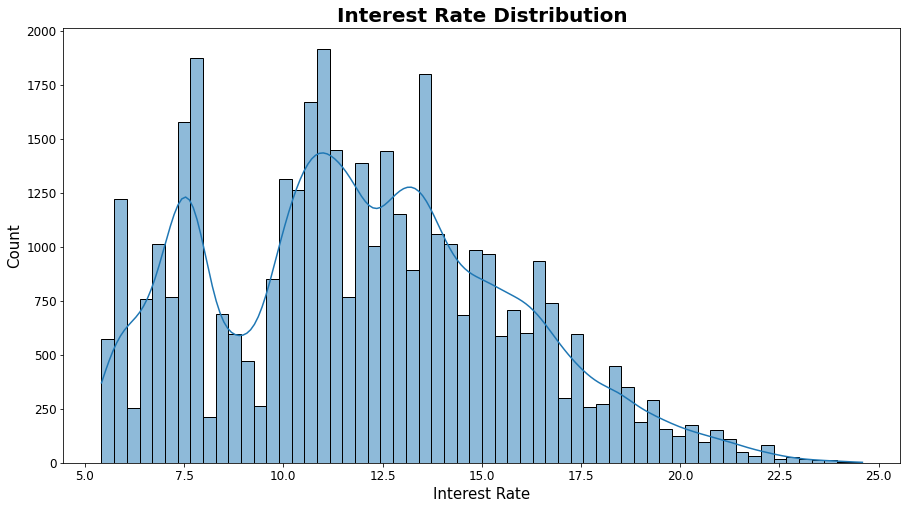

In [ ]:

plt.figure(figsize = (15,8))
sns.histplot(x=lending_club_loans_dataset_copy.int_rate,kde=True)
plt.title('Interest Rate Distribution', fontsize = 20, weight='bold')
plt.xlabel('Interest Rate', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


It can be inferred that many loan done has interest rate lies between 7-14 %


#### Grade

Text(0, 0.5, 'Count')

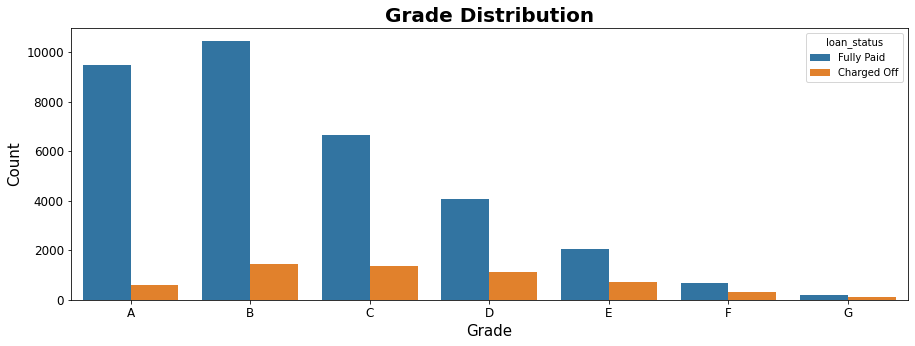

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(x=lending_club_loans_dataset_copy.sort_values(by='grade').grade, hue = lending_club_loans_dataset_copy.loan_status)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Grade Distribution", fontsize = 20, weight='bold')
plt.xlabel("Grade", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

From the chart above we see that as the grade is degrading, more loans are categorised as `Charged Off` than `Fully Paid`,which is reasonable because lower grade means that the chances of defaulting are more.

#### Distribution of Loan Amount and Interest Rate by Loan Status

Text(0.5, 1.0, 'Distribution of Loan Amounts by Loan Status')

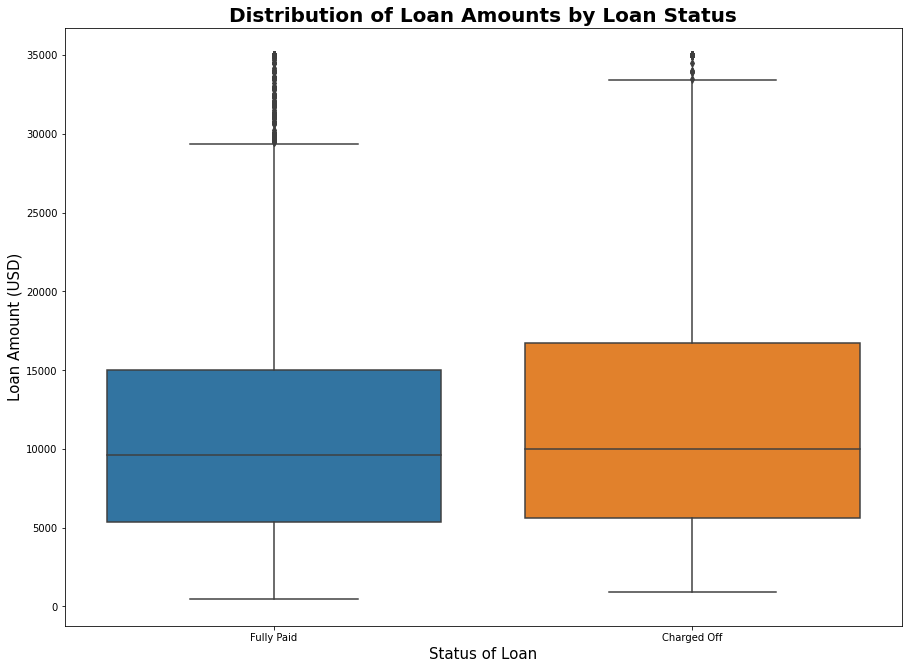

In [ ]:
plt.figure(figsize = (15,11))
sns.boxplot(data=lending_club_loans_dataset_copy, x='loan_status', y='loan_amnt')
plt.title('Distribution of Loan Amounts by Loan Status')
plt.xlabel('Status of Loan', fontsize = 15)
plt.ylabel('Loan Amount (USD)', fontsize = 15)
plt.title('Distribution of Loan Amounts by Loan Status', fontsize = 20, weight='bold')

`Fully Paid` and `Charged off` has relatively the same loan amount, so nothing much can be said with this.


Text(0.5, 1.0, 'Distribution of Loan intererst rates by Loan Status')

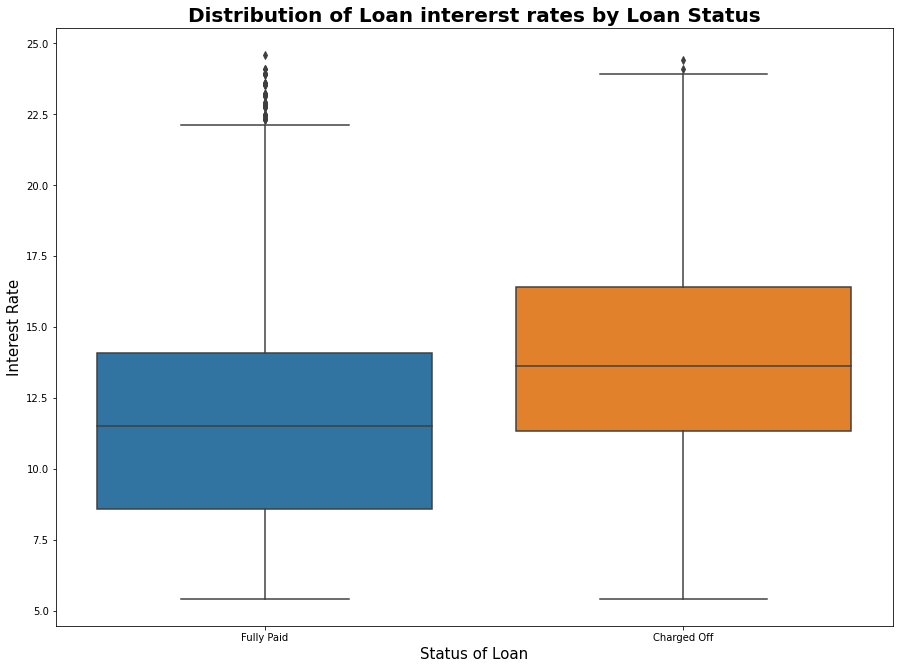

In [ ]:
plt.figure(figsize = (15,11))
sns.boxplot(data=lending_club_loans_dataset_copy, x='loan_status', y='int_rate')
plt.xlabel('Status of Loan', fontsize = 15)
plt.ylabel('Interest Rate', fontsize = 15)
plt.title('Distribution of Loan intererst rates by Loan Status', fontsize = 20, weight='bold')

The graphic above shows that `Charged off` has relatively higher interest rate compared to `Fully Paid`. This means that with higher interest rate, borrowers are more unlikely to repay their debt, and this is totally reasonable.


# **Feature Encoding**

## **Handling categorical values**

In [ ]:
lending_club_loans_dataset['grade'].value_counts()


B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

In [ ]:
lending_club_loans_dataset['sub_grade'].value_counts()


B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64

In [ ]:
lending_club_loans_dataset['home_ownership'].value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

In [ ]:
lending_club_loans_dataset['loan_status'].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [ ]:
lending_club_loans_dataset['addr_state'].value_counts()

CA    7429
NY    4065
FL    3104
TX    2915
NJ    1988
IL    1672
PA    1651
GA    1503
VA    1487
MA    1438
OH    1329
MD    1125
AZ     933
WA     888
CO     857
NC     830
CT     816
MI     796
MO     765
MN     652
NV     527
WI     516
SC     489
AL     484
OR     468
LA     461
KY     359
OK     317
KS     298
UT     278
AR     261
DC     224
RI     208
NM     205
NH     188
WV     187
HI     181
DE     136
MT      96
WY      87
AK      86
SD      67
VT      57
TN      32
MS      26
IN      19
IA      12
NE      11
ID       9
ME       3
Name: addr_state, dtype: int64

So we can see that the above 4 columns have categorical values. So, we'll create a mapping dictionary for each.

In [ ]:
mapping_dictionary_grade = {}
mapping_dictionary_sub_grade = {}
mapping_dictionary_home_ownership = {}
mapping_dictionary_loan_status = {}
mapping_dictionary_addr_state = {}

j=0
for i in list(dict(lending_club_loans_dataset['grade'].value_counts()).keys()):
  mapping_dictionary_grade[i] = j
  j+=1

j=0
for i in list(dict(lending_club_loans_dataset['sub_grade'].value_counts()).keys()):
  mapping_dictionary_sub_grade[i] = j
  j+=1

j=0
for i in list(dict(lending_club_loans_dataset['home_ownership'].value_counts()).keys()):
  mapping_dictionary_home_ownership[i] = j
  j+=1

j=0
for i in list(dict(lending_club_loans_dataset['loan_status'].value_counts()).keys()):
  mapping_dictionary_loan_status[i] = j
  j+=1

j=0
for i in list(dict(lending_club_loans_dataset['addr_state'].value_counts()).keys()):
  mapping_dictionary_addr_state[i] = j
  j+=1

In [ ]:
lending_club_loans_dataset.replace({ 'grade': mapping_dictionary_grade }, inplace=True)
lending_club_loans_dataset.replace({ 'sub_grade': mapping_dictionary_sub_grade }, inplace=True)
lending_club_loans_dataset.replace({ 'home_ownership': mapping_dictionary_home_ownership }, inplace=True)
lending_club_loans_dataset.replace({ 'loan_status': mapping_dictionary_loan_status }, inplace=True)
lending_club_loans_dataset.replace({ 'addr_state': mapping_dictionary_addr_state }, inplace=True)

In [ ]:
lending_club_loans_dataset.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,loan_status,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low
0,1077501,5000.0,5000.0,4975.0,10.65%,162.87,0,7,0,24000.0,0,12,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,0.837,9.0,744.0,740.0
1,1077430,2500.0,2500.0,2500.0,15.27%,59.83,2,13,0,30000.0,1,7,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,0.094,4.0,499.0,0.0
2,1077175,2400.0,2400.0,2400.0,15.96%,84.33,2,15,0,12252.0,0,5,8.72,0.0,735.0,739.0,2.0,2.0,0.0,2956.0,0.985,10.0,719.0,715.0
3,1076863,10000.0,10000.0,10000.0,13.49%,339.31,2,5,0,49200.0,0,0,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,0.210,37.0,604.0,600.0
4,1075358,3000.0,3000.0,3000.0,12.69%,67.79,0,2,0,80000.0,4,24,17.94,0.0,695.0,699.0,0.0,15.0,0.0,27783.0,0.539,38.0,694.0,690.0
5,1075269,5000.0,5000.0,5000.0,7.90%,156.46,1,1,0,36000.0,0,12,11.20,0.0,730.0,734.0,3.0,9.0,0.0,7963.0,0.283,12.0,679.0,675.0
6,1069639,7000.0,7000.0,7000.0,15.96%,170.08,2,15,0,47004.0,0,15,23.51,0.0,690.0,694.0,1.0,7.0,0.0,17726.0,0.856,11.0,654.0,650.0
7,1072053,3000.0,3000.0,3000.0,18.64%,109.43,4,20,0,48000.0,0,0,5.35,0.0,660.0,664.0,2.0,4.0,0.0,8221.0,0.875,4.0,689.0,685.0
8,1071795,5600.0,5600.0,5600.0,21.28%,152.39,5,26,2,40000.0,1,0,5.55,0.0,675.0,679.0,2.0,11.0,0.0,5210.0,0.326,13.0,499.0,0.0
9,1071570,5375.0,5375.0,5350.0,12.69%,121.45,0,2,0,15000.0,1,3,18.08,0.0,725.0,729.0,0.0,2.0,0.0,9279.0,0.365,3.0,519.0,515.0


## **Handling other string type data**

In [ ]:
lending_club_loans_dataset.dtypes

id                       object
loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
int_rate                 object
installment             float64
grade                     int64
sub_grade                 int64
home_ownership            int64
annual_inc              float64
loan_status               int64
addr_state                int64
dti                     float64
delinq_2yrs             float64
fico_range_low          float64
fico_range_high         float64
inq_last_6mths          float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
last_fico_range_high    float64
last_fico_range_low     float64
dtype: object

In [ ]:
lending_club_loans_dataset.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,loan_status,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low
0,1077501,5000.0,5000.0,4975.0,10.65%,162.87,0,7,0,24000.0,0,12,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,0.837,9.0,744.0,740.0
1,1077430,2500.0,2500.0,2500.0,15.27%,59.83,2,13,0,30000.0,1,7,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,0.094,4.0,499.0,0.0
2,1077175,2400.0,2400.0,2400.0,15.96%,84.33,2,15,0,12252.0,0,5,8.72,0.0,735.0,739.0,2.0,2.0,0.0,2956.0,0.985,10.0,719.0,715.0
3,1076863,10000.0,10000.0,10000.0,13.49%,339.31,2,5,0,49200.0,0,0,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,0.210,37.0,604.0,600.0
4,1075358,3000.0,3000.0,3000.0,12.69%,67.79,0,2,0,80000.0,4,24,17.94,0.0,695.0,699.0,0.0,15.0,0.0,27783.0,0.539,38.0,694.0,690.0


As we can see the int_rate column can be changed to float if we remove the percentage sign at the end from each value of the column.

In [ ]:
# matching the values of the int_rate column with a regex pattern to confirm that all the values end with a % sign
lending_club_loans_dataset['int_rate'].str.match(r'^.*\%$').value_counts()

True    42535
Name: int_rate, dtype: int64

So it's confirmed that all the values in the column ends with a '%' sign. So, let's replace the '%' in each value with ' '.

In [ ]:
lending_club_loans_dataset['int_rate'].replace('\%', '', regex=True, inplace=True)

Now, lets convert the datatype of that column to float.

In [ ]:
lending_club_loans_dataset['int_rate'] = lending_club_loans_dataset['int_rate'].astype('float')

In [ ]:
lending_club_loans_dataset.dtypes

id                       object
loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
int_rate                float64
installment             float64
grade                     int64
sub_grade                 int64
home_ownership            int64
annual_inc              float64
loan_status               int64
addr_state                int64
dti                     float64
delinq_2yrs             float64
fico_range_low          float64
fico_range_high         float64
inq_last_6mths          float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
last_fico_range_high    float64
last_fico_range_low     float64
dtype: object

So we have converted the int_rate column to float datatype now. And so we have only numeric values in our dataset.

In [ ]:
lending_club_loans_dataset.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,loan_status,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low
0,1077501,5000.0,5000.0,4975.0,10.65,162.87,0,7,0,24000.0,0,12,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,0.837,9.0,744.0,740.0
1,1077430,2500.0,2500.0,2500.0,15.27,59.83,2,13,0,30000.0,1,7,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,0.094,4.0,499.0,0.0
2,1077175,2400.0,2400.0,2400.0,15.96,84.33,2,15,0,12252.0,0,5,8.72,0.0,735.0,739.0,2.0,2.0,0.0,2956.0,0.985,10.0,719.0,715.0
3,1076863,10000.0,10000.0,10000.0,13.49,339.31,2,5,0,49200.0,0,0,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,0.210,37.0,604.0,600.0
4,1075358,3000.0,3000.0,3000.0,12.69,67.79,0,2,0,80000.0,4,24,17.94,0.0,695.0,699.0,0.0,15.0,0.0,27783.0,0.539,38.0,694.0,690.0
5,1075269,5000.0,5000.0,5000.0,7.90,156.46,1,1,0,36000.0,0,12,11.20,0.0,730.0,734.0,3.0,9.0,0.0,7963.0,0.283,12.0,679.0,675.0
6,1069639,7000.0,7000.0,7000.0,15.96,170.08,2,15,0,47004.0,0,15,23.51,0.0,690.0,694.0,1.0,7.0,0.0,17726.0,0.856,11.0,654.0,650.0
7,1072053,3000.0,3000.0,3000.0,18.64,109.43,4,20,0,48000.0,0,0,5.35,0.0,660.0,664.0,2.0,4.0,0.0,8221.0,0.875,4.0,689.0,685.0
8,1071795,5600.0,5600.0,5600.0,21.28,152.39,5,26,2,40000.0,1,0,5.55,0.0,675.0,679.0,2.0,11.0,0.0,5210.0,0.326,13.0,499.0,0.0
9,1071570,5375.0,5375.0,5350.0,12.69,121.45,0,2,0,15000.0,1,3,18.08,0.0,725.0,729.0,0.0,2.0,0.0,9279.0,0.365,3.0,519.0,515.0


In [ ]:
unique_value = lending_club_loans_dataset["loan_status"].nunique()
print(unique_value)

9


Setting the target variable to be loan_status

In [ ]:
t=['loan_status']
target_column = lending_club_loans_dataset['loan_status']
lending_club_loans_dataset = lending_club_loans_dataset.drop(t, axis=1)

In [ ]:
lending_club_loans_dataset.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low
0,1077501,5000.0,5000.0,4975.0,10.65,162.87,0,7,0,24000.0,12,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,0.837,9.0,744.0,740.0
1,1077430,2500.0,2500.0,2500.0,15.27,59.83,2,13,0,30000.0,7,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,0.094,4.0,499.0,0.0
2,1077175,2400.0,2400.0,2400.0,15.96,84.33,2,15,0,12252.0,5,8.72,0.0,735.0,739.0,2.0,2.0,0.0,2956.0,0.985,10.0,719.0,715.0
3,1076863,10000.0,10000.0,10000.0,13.49,339.31,2,5,0,49200.0,0,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,0.210,37.0,604.0,600.0
4,1075358,3000.0,3000.0,3000.0,12.69,67.79,0,2,0,80000.0,24,17.94,0.0,695.0,699.0,0.0,15.0,0.0,27783.0,0.539,38.0,694.0,690.0


# **Feature Engineering**

Details of lending_club_loans_dataset features for feature engineering 

In [ ]:
lending_club_loans_dataset.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low
0,1077501,5000.0,5000.0,4975.0,10.65,162.87,0,7,0,24000.0,12,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,0.837,9.0,744.0,740.0
1,1077430,2500.0,2500.0,2500.0,15.27,59.83,2,13,0,30000.0,7,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,0.094,4.0,499.0,0.0
2,1077175,2400.0,2400.0,2400.0,15.96,84.33,2,15,0,12252.0,5,8.72,0.0,735.0,739.0,2.0,2.0,0.0,2956.0,0.985,10.0,719.0,715.0
3,1076863,10000.0,10000.0,10000.0,13.49,339.31,2,5,0,49200.0,0,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,0.210,37.0,604.0,600.0
4,1075358,3000.0,3000.0,3000.0,12.69,67.79,0,2,0,80000.0,24,17.94,0.0,695.0,699.0,0.0,15.0,0.0,27783.0,0.539,38.0,694.0,690.0


For feature engineering, we will check the following:
Check for columns with same values,
Check for columns with null values,
Check for columns with no corelation to the target column, loan_status.
Replace these coluns with more meaningful data columns.

## **Handling similar and null value columns**



In [ ]:
lending_club_loans_dataset.isna().sum()

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
addr_state              0
dti                     0
delinq_2yrs             0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
last_fico_range_high    0
last_fico_range_low     0
dtype: int64

Now lets check which columns has similar values.

In [ ]:
for i in lending_club_loans_dataset.columns:
  print (i , ":", lending_club_loans_dataset.value_counts())
  print ("-"*40)

id : id       loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  grade  sub_grade  home_ownership  annual_inc  addr_state  dti    delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  last_fico_range_high  last_fico_range_low
999989   8000.0     8000.0       8000.0           12.69     268.36       0      2          1               120000.0    0           20.14  0.0          675.0           679.0            0.0             16.0      0.0      45393.0    0.841       37.0       714.0                 710.0                  1
490460   4000.0     4000.0       4000.0           9.88      128.85       0      8          0               33227.0     12          11.85  0.0          715.0           719.0            1.0             9.0       0.0      2249.0     0.146       11.0       799.0                 795.0                  1
490444   15000.0    15000.0      14950.0          10.62     488.40       0      0          0        

We drop columns with all rows with similar values and null values.

In [ ]:
lending_club_loans_dataset = lending_club_loans_dataset.drop(['pub_rec', 'home_ownership'], axis=1)

In [ ]:
lending_club_loans_dataset.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,annual_inc,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low
0,1077501,5000.0,5000.0,4975.0,10.65,162.87,0,7,24000.0,12,27.65,0.0,735.0,739.0,1.0,3.0,13648.0,0.837,9.0,744.0,740.0
1,1077430,2500.0,2500.0,2500.0,15.27,59.83,2,13,30000.0,7,1.00,0.0,740.0,744.0,5.0,3.0,1687.0,0.094,4.0,499.0,0.0
2,1077175,2400.0,2400.0,2400.0,15.96,84.33,2,15,12252.0,5,8.72,0.0,735.0,739.0,2.0,2.0,2956.0,0.985,10.0,719.0,715.0
3,1076863,10000.0,10000.0,10000.0,13.49,339.31,2,5,49200.0,0,20.00,0.0,690.0,694.0,1.0,10.0,5598.0,0.210,37.0,604.0,600.0
4,1075358,3000.0,3000.0,3000.0,12.69,67.79,0,2,80000.0,24,17.94,0.0,695.0,699.0,0.0,15.0,27783.0,0.539,38.0,694.0,690.0


## **handle columns with less corelation to target column**

Now, we combine a few columns into one.

In [ ]:
lending_club_loans_dataset[['delinq_2yrs','grade']]

,delinq_2yrs,grade
0,0.000000,0
1,0.000000,2
2,0.000000,2
3,0.000000,2
4,0.000000,0
...,...,...
42532,0.152449,2
42533,0.152449,0
42534,0.152449,0
42535,0.152449,1


Now , we will combine both these columns into one.

In [ ]:
lending_club_loans_dataset['delinq_2yrs_grade']= lending_club_loans_dataset['delinq_2yrs'] + lending_club_loans_dataset['grade']

lending_club_loans_dataset['delinq_2yrs_grade']

0        0.000000
1        2.000000
2        2.000000
3        2.000000
4        0.000000
           ...   
42532    2.152449
42533    0.152449
42534    0.152449
42535    1.152449
42550    1.152449
Name: delinq_2yrs_grade, Length: 42535, dtype: float64

In [ ]:
lending_club_loans_dataset.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,annual_inc,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,delinq_2yrs_grade
0,1077501,5000.0,5000.0,4975.0,10.65,162.87,0,7,24000.0,12,27.65,0.0,735.0,739.0,1.0,3.0,13648.0,0.837,9.0,744.0,740.0,0.0
1,1077430,2500.0,2500.0,2500.0,15.27,59.83,2,13,30000.0,7,1.00,0.0,740.0,744.0,5.0,3.0,1687.0,0.094,4.0,499.0,0.0,2.0
2,1077175,2400.0,2400.0,2400.0,15.96,84.33,2,15,12252.0,5,8.72,0.0,735.0,739.0,2.0,2.0,2956.0,0.985,10.0,719.0,715.0,2.0
3,1076863,10000.0,10000.0,10000.0,13.49,339.31,2,5,49200.0,0,20.00,0.0,690.0,694.0,1.0,10.0,5598.0,0.210,37.0,604.0,600.0,2.0
4,1075358,3000.0,3000.0,3000.0,12.69,67.79,0,2,80000.0,24,17.94,0.0,695.0,699.0,0.0,15.0,27783.0,0.539,38.0,694.0,690.0,0.0


## **Appying custom functions to make column easily interpretable by ml algorithms**

Since we see that the maximum values are 0, we apply the following function

In [ ]:
lending_club_loans_dataset['revol_bal']

0        13648.0
1         1687.0
2         2956.0
3         5598.0
4        27783.0
          ...   
42532        0.0
42533        0.0
42534        0.0
42535        0.0
42550        0.0
Name: revol_bal, Length: 42535, dtype: float64

In [ ]:
def revol_bal(lending_club_loans_dataset):
  if lending_club_loans_dataset['revol_bal']> 0.0:
    return 1
  #corresponds to enough balance
  else:
    return 0
  #corresponds to zero balance

lending_club_loans_dataset['revol_bal']= lending_club_loans_dataset.apply(lambda lending_club_loans_dataset:revol_bal(lending_club_loans_dataset), axis=1)

Now, lets check the data

In [ ]:
lending_club_loans_dataset.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,annual_inc,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,delinq_2yrs_grade
0,1077501,5000.0,5000.0,4975.0,10.65,162.87,0,7,24000.0,12,27.65,0.0,735.0,739.0,1.0,3.0,1,0.837,9.0,744.0,740.0,0.0
1,1077430,2500.0,2500.0,2500.0,15.27,59.83,2,13,30000.0,7,1.00,0.0,740.0,744.0,5.0,3.0,1,0.094,4.0,499.0,0.0,2.0
2,1077175,2400.0,2400.0,2400.0,15.96,84.33,2,15,12252.0,5,8.72,0.0,735.0,739.0,2.0,2.0,1,0.985,10.0,719.0,715.0,2.0
3,1076863,10000.0,10000.0,10000.0,13.49,339.31,2,5,49200.0,0,20.00,0.0,690.0,694.0,1.0,10.0,1,0.210,37.0,604.0,600.0,2.0
4,1075358,3000.0,3000.0,3000.0,12.69,67.79,0,2,80000.0,24,17.94,0.0,695.0,699.0,0.0,15.0,1,0.539,38.0,694.0,690.0,0.0


Since, the dataset is now settled, we stop doing further feature engineering.

# **Feature Binning**

## **Identify columns that can undergo binning**

We will apply binning in columns with highly varied data values, in which the data is not directely related to the target column.

In [ ]:
lending_club_loans_dataset.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,annual_inc,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,delinq_2yrs_grade
0,1077501,5000.0,5000.0,4975.0,10.65,162.87,0,7,24000.0,12,27.65,0.0,735.0,739.0,1.0,3.0,1,0.837,9.0,744.0,740.0,0.0
1,1077430,2500.0,2500.0,2500.0,15.27,59.83,2,13,30000.0,7,1.00,0.0,740.0,744.0,5.0,3.0,1,0.094,4.0,499.0,0.0,2.0
2,1077175,2400.0,2400.0,2400.0,15.96,84.33,2,15,12252.0,5,8.72,0.0,735.0,739.0,2.0,2.0,1,0.985,10.0,719.0,715.0,2.0
3,1076863,10000.0,10000.0,10000.0,13.49,339.31,2,5,49200.0,0,20.00,0.0,690.0,694.0,1.0,10.0,1,0.210,37.0,604.0,600.0,2.0
4,1075358,3000.0,3000.0,3000.0,12.69,67.79,0,2,80000.0,24,17.94,0.0,695.0,699.0,0.0,15.0,1,0.539,38.0,694.0,690.0,0.0


We notice that we can apply feature binning in columns like 'annual_inc', 'loan_amnt' and 'funded_amnt'.

Lets check the 'annual_inc' column.

In [ ]:
lending_club_loans_dataset['annual_inc']

0         24000.00000
1         30000.00000
2         12252.00000
3         49200.00000
4         80000.00000
             ...     
42532    180000.00000
42533     12000.00000
42534    110000.00000
42535     69136.55642
42550     70000.00000
Name: annual_inc, Length: 42535, dtype: float64

Since, it has varied values, we perform binning using the following function:

In [ ]:
def binningFunc(col, cut_points, labels=None):
  min_val= col.min()
  max_val= col.max()
  break_points= [min_val] + cut_points + [max_val]
  print (break_points)
  if not labels:
    labels= range(len(cut_points)+1)
  col_bin= pd.cut(col, bins=break_points, labels=labels, include_lowest=True)
  return col_bin;


In [ ]:
cut_points=[60000, 300000]
labels=['low_inc','avg_inc','high_inc']
lending_club_loans_dataset['annual_inc_binned'] = binningFunc(lending_club_loans_dataset['annual_inc'], cut_points, labels)
lending_club_loans_dataset.head(20)


[1896.0, 60000, 300000, 6000000.0]


,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,annual_inc,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,delinq_2yrs_grade,annual_inc_binned
0,1077501,5000.0,5000.0,4975.0,10.65,162.87,0,7,24000.00,12,27.65,0.0,735.0,739.0,1.0,3.0,1,0.8370,9.0,744.0,740.0,0.0,low_inc
1,1077430,2500.0,2500.0,2500.0,15.27,59.83,2,13,30000.00,7,1.00,0.0,740.0,744.0,5.0,3.0,1,0.0940,4.0,499.0,0.0,2.0,low_inc
2,1077175,2400.0,2400.0,2400.0,15.96,84.33,2,15,12252.00,5,8.72,0.0,735.0,739.0,2.0,2.0,1,0.9850,10.0,719.0,715.0,2.0,low_inc
3,1076863,10000.0,10000.0,10000.0,13.49,339.31,2,5,49200.00,0,20.00,0.0,690.0,694.0,1.0,10.0,1,0.2100,37.0,604.0,600.0,2.0,low_inc
4,1075358,3000.0,3000.0,3000.0,12.69,67.79,0,2,80000.00,24,17.94,0.0,695.0,699.0,0.0,15.0,1,0.5390,38.0,694.0,690.0,0.0,avg_inc
5,1075269,5000.0,5000.0,5000.0,7.90,156.46,1,1,36000.00,12,11.20,0.0,730.0,734.0,3.0,9.0,1,0.2830,12.0,679.0,675.0,1.0,low_inc
6,1069639,7000.0,7000.0,7000.0,15.96,170.08,2,15,47004.00,15,23.51,0.0,690.0,694.0,1.0,7.0,1,0.8560,11.0,654.0,650.0,2.0,low_inc
7,1072053,3000.0,3000.0,3000.0,18.64,109.43,4,20,48000.00,0,5.35,0.0,660.0,664.0,2.0,4.0,1,0.8750,4.0,689.0,685.0,4.0,low_inc
8,1071795,5600.0,5600.0,5600.0,21.28,152.39,5,26,40000.00,0,5.55,0.0,675.0,679.0,2.0,11.0,1,0.3260,13.0,499.0,0.0,5.0,low_inc
9,1071570,5375.0,5375.0,5350.0,12.69,121.45,0,2,15000.00,3,18.08,0.0,725.0,729.0,0.0,2.0,1,0.3650,3.0,519.0,515.0,0.0,low_inc


Now, lets apply binning in 'funded_amnt' column.

In [ ]:
lending_club_loans_dataset['funded_amnt'].value_counts()

10000.0    2924
12000.0    2347
5000.0     2247
6000.0     2023
15000.0    1897
           ... 
29375.0       1
30525.0       1
27800.0       1
21875.0       1
19250.0       1
Name: funded_amnt, Length: 1051, dtype: int64

In [ ]:
cut_points=[1000, 10000]
labels=[0,1,2]

#these labels correspond to low, avg and high funded amounts.

lending_club_loans_dataset['funded_amnt_binned'] = binningFunc(lending_club_loans_dataset['funded_amnt'], cut_points, labels)
lending_club_loans_dataset['funded_amnt_binned']=lending_club_loans_dataset['funded_amnt_binned'].astype(int)
lending_club_loans_dataset.head(20)


[500.0, 1000, 10000, 35000.0]


,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,annual_inc,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,delinq_2yrs_grade,annual_inc_binned,funded_amnt_binned
0,1077501,5000.0,5000.0,4975.0,10.65,162.87,0,7,24000.00,12,27.65,0.0,735.0,739.0,1.0,3.0,1,0.8370,9.0,744.0,740.0,0.0,low_inc,1
1,1077430,2500.0,2500.0,2500.0,15.27,59.83,2,13,30000.00,7,1.00,0.0,740.0,744.0,5.0,3.0,1,0.0940,4.0,499.0,0.0,2.0,low_inc,1
2,1077175,2400.0,2400.0,2400.0,15.96,84.33,2,15,12252.00,5,8.72,0.0,735.0,739.0,2.0,2.0,1,0.9850,10.0,719.0,715.0,2.0,low_inc,1
3,1076863,10000.0,10000.0,10000.0,13.49,339.31,2,5,49200.00,0,20.00,0.0,690.0,694.0,1.0,10.0,1,0.2100,37.0,604.0,600.0,2.0,low_inc,1
4,1075358,3000.0,3000.0,3000.0,12.69,67.79,0,2,80000.00,24,17.94,0.0,695.0,699.0,0.0,15.0,1,0.5390,38.0,694.0,690.0,0.0,avg_inc,1
5,1075269,5000.0,5000.0,5000.0,7.90,156.46,1,1,36000.00,12,11.20,0.0,730.0,734.0,3.0,9.0,1,0.2830,12.0,679.0,675.0,1.0,low_inc,1
6,1069639,7000.0,7000.0,7000.0,15.96,170.08,2,15,47004.00,15,23.51,0.0,690.0,694.0,1.0,7.0,1,0.8560,11.0,654.0,650.0,2.0,low_inc,1
7,1072053,3000.0,3000.0,3000.0,18.64,109.43,4,20,48000.00,0,5.35,0.0,660.0,664.0,2.0,4.0,1,0.8750,4.0,689.0,685.0,4.0,low_inc,1
8,1071795,5600.0,5600.0,5600.0,21.28,152.39,5,26,40000.00,0,5.55,0.0,675.0,679.0,2.0,11.0,1,0.3260,13.0,499.0,0.0,5.0,low_inc,1
9,1071570,5375.0,5375.0,5350.0,12.69,121.45,0,2,15000.00,3,18.08,0.0,725.0,729.0,0.0,2.0,1,0.3650,3.0,519.0,515.0,0.0,low_inc,1


## **Drop columns that are now binned**

Since we have revised the columns that were suitable for bining, we can now drop the original columns.

In [ ]:
lending_club_loans_dataset.drop(['funded_amnt', 'annual_inc'], axis=1,inplace=True)

In [ ]:
lending_club_loans_dataset.head()

,id,loan_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,delinq_2yrs_grade,annual_inc_binned,funded_amnt_binned
0,1077501,5000.0,4975.0,10.65,162.87,0,7,12,27.65,0.0,735.0,739.0,1.0,3.0,1,0.837,9.0,744.0,740.0,0.0,low_inc,1
1,1077430,2500.0,2500.0,15.27,59.83,2,13,7,1.00,0.0,740.0,744.0,5.0,3.0,1,0.094,4.0,499.0,0.0,2.0,low_inc,1
2,1077175,2400.0,2400.0,15.96,84.33,2,15,5,8.72,0.0,735.0,739.0,2.0,2.0,1,0.985,10.0,719.0,715.0,2.0,low_inc,1
3,1076863,10000.0,10000.0,13.49,339.31,2,5,0,20.00,0.0,690.0,694.0,1.0,10.0,1,0.210,37.0,604.0,600.0,2.0,low_inc,1
4,1075358,3000.0,3000.0,12.69,67.79,0,2,24,17.94,0.0,695.0,699.0,0.0,15.0,1,0.539,38.0,694.0,690.0,0.0,avg_inc,1


We successfully did feature binning in the dataset!

# **Feature Scaling**

In [ ]:
#lending_club_loans_dataset.describe()
lending_club_loans_dataset.iloc[-1]


id                         70686
loan_amnt                   5000
funded_amnt_inv                0
int_rate                    7.75
installment               156.11
grade                          1
sub_grade                      9
addr_state                    16
dti                         8.81
delinq_2yrs             0.152449
fico_range_low               770
fico_range_high              774
inq_last_6mths           1.08142
open_acc                 9.34395
revol_bal                      0
revol_util              0.491172
total_acc                22.1244
last_fico_range_high         794
last_fico_range_low          790
delinq_2yrs_grade        1.15245
annual_inc_binned        avg_inc
funded_amnt_binned             1
Name: 42550, dtype: object

## **MinMaxScaler**

MIN-MAX SCALER is used for "amount" features as there is a wide value distribution and each of them should contribute equally.This will give wrong predictions if not scaled.It does not lead to range shrinkage maintaining balance. 

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
lending_club_loans_dataset[["loan_amnt"]] = min_max_scaler.fit_transform(lending_club_loans_dataset[["loan_amnt"]])
lending_club_loans_dataset.isnull().sum(axis=0)

id                      0
loan_amnt               0
funded_amnt_inv         0
int_rate                0
installment             0
grade                   0
sub_grade               0
addr_state              0
dti                     0
delinq_2yrs             0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
revol_bal               0
revol_util              0
total_acc               0
last_fico_range_high    0
last_fico_range_low     0
delinq_2yrs_grade       0
annual_inc_binned       0
funded_amnt_binned      0
dtype: int64

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
lending_club_loans_dataset[["funded_amnt_inv","installment"]] = min_max_scaler.fit_transform(lending_club_loans_dataset[["funded_amnt_inv","installment"]])
lending_club_loans_dataset.isnull().sum(axis=0)


id                      0
loan_amnt               0
funded_amnt_inv         0
int_rate                0
installment             0
grade                   0
sub_grade               0
addr_state              0
dti                     0
delinq_2yrs             0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
revol_bal               0
revol_util              0
total_acc               0
last_fico_range_high    0
last_fico_range_low     0
delinq_2yrs_grade       0
annual_inc_binned       0
funded_amnt_binned      0
dtype: int64

##**StandardScaler**

StandardScaler is applied on "rate" and "range" features as there aren't drastic outliers that might affect scaling.It removes the mean and scales the data to unit variance. The scaling shrinks the range of the feature values to fit a bell curve.

In [ ]:
Standardisation = preprocessing.StandardScaler()
lending_club_loans_dataset[["int_rate","fico_range_low","fico_range_high","last_fico_range_high","last_fico_range_low"]] = Standardisation.fit_transform(lending_club_loans_dataset[["int_rate","fico_range_low","fico_range_high","last_fico_range_high","last_fico_range_low"]])
lending_club_loans_dataset.isnull().sum(axis=0)


id                      0
loan_amnt               0
funded_amnt_inv         0
int_rate                0
installment             0
grade                   0
sub_grade               0
addr_state              0
dti                     0
delinq_2yrs             0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
revol_bal               0
revol_util              0
total_acc               0
last_fico_range_high    0
last_fico_range_low     0
delinq_2yrs_grade       0
annual_inc_binned       0
funded_amnt_binned      0
dtype: int64

In [ ]:
lending_club_loans_dataset.head()

,id,loan_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,delinq_2yrs_grade,annual_inc_binned,funded_amnt_binned
0,1077501,0.130435,0.142143,-0.408592,0.114151,0,7,12,27.65,0.0,0.606484,0.606484,1.0,3.0,1,0.837,9.0,0.681962,0.534553,0.0,low_inc,1
1,1077430,0.057971,0.071429,0.837399,0.034245,2,13,7,1.00,0.0,0.744651,0.744651,5.0,3.0,1,0.094,4.0,-2.372827,-5.683404,2.0,low_inc,1
2,1077175,0.055072,0.068571,1.023488,0.053245,2,15,5,8.72,0.0,0.606484,0.606484,2.0,2.0,1,0.985,10.0,0.370249,0.324487,2.0,low_inc,1
3,1076863,0.275362,0.285714,0.357342,0.250977,2,5,0,20.00,0.0,-0.637022,-0.637022,1.0,10.0,1,0.210,37.0,-1.063631,-0.641817,2.0,low_inc,1
4,1075358,0.072464,0.085714,0.141586,0.040418,0,2,24,17.94,0.0,-0.498854,-0.498854,0.0,15.0,1,0.539,38.0,0.058536,0.114421,0.0,avg_inc,1


In [ ]:
lending_club_loans_dataset.describe()


,loan_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,delinq_2yrs_grade,funded_amnt_binned
count,42535.000000,42535.000000,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,4.253500e+04,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,4.253500e+04,4.253500e+04,42535.000000,42535.000000
mean,0.306948,0.289709,-1.390469e-15,0.238037,1.618996,9.520136,8.930081,13.373043,0.152449,1.283192e-15,1.283192e-15,1.081424,9.343951,0.973692,0.491172,22.124406,-1.242620e-15,-1.295465e-15,1.771445,1.409639
std,0.214810,0.203762,1.000012e+00,0.162019,1.479134,7.585531,9.612627,6.726315,0.512232,1.000012e+00,1.000012e+00,1.526934,4.494741,0.160051,0.283342,11.588859,1.000012e+00,1.000012e+00,1.631526,0.508739
min,0.000000,0.000000,-1.819097e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.847698e+00,-2.847698e+00,0.000000,1.000000,0.000000,0.000000,1.000000,-8.594621e+00,-5.683404e+00,0.000000,0.000000
25%,0.136232,0.141429,-6.836811e-01,0.116206,0.000000,3.000000,1.000000,8.200000,0.000000,-7.751889e-01,-7.751889e-01,0.000000,6.000000,1.000000,0.258000,13.000000,-5.648904e-01,-3.057113e-01,0.000000,1.000000
50%,0.266667,0.242857,-4.720085e-02,0.203192,1.000000,8.000000,6.000000,13.470000,0.000000,-8.435238e-02,-8.435238e-02,1.000000,9.000000,1.000000,0.496000,20.000000,1.208786e-01,1.564342e-01,1.000000,1.000000
75%,0.420290,0.400000,6.890666e-01,0.319894,3.000000,15.000000,14.000000,18.680000,0.000000,7.446514e-01,7.446514e-01,2.000000,12.000000,1.000000,0.726000,29.000000,6.819623e-01,5.345532e-01,3.000000,2.000000
max,1.000000,1.000000,3.350956e+00,1.000000,6.000000,34.000000,49.000000,29.990000,13.000000,3.093495e+00,3.093495e+00,33.000000,47.000000,1.000000,1.190000,90.000000,2.003626e+00,1.416831e+00,17.000000,2.000000


# **Feature Selection**


In [ ]:
lending_club_loans_dataset.head()


,id,loan_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,delinq_2yrs_grade,annual_inc_binned,funded_amnt_binned
0,1077501,0.130435,0.142143,-0.408592,0.114151,0,7,12,27.65,0.0,0.606484,0.606484,1.0,3.0,1,0.837,9.0,0.681962,0.534553,0.0,low_inc,1
1,1077430,0.057971,0.071429,0.837399,0.034245,2,13,7,1.00,0.0,0.744651,0.744651,5.0,3.0,1,0.094,4.0,-2.372827,-5.683404,2.0,low_inc,1
2,1077175,0.055072,0.068571,1.023488,0.053245,2,15,5,8.72,0.0,0.606484,0.606484,2.0,2.0,1,0.985,10.0,0.370249,0.324487,2.0,low_inc,1
3,1076863,0.275362,0.285714,0.357342,0.250977,2,5,0,20.00,0.0,-0.637022,-0.637022,1.0,10.0,1,0.210,37.0,-1.063631,-0.641817,2.0,low_inc,1
4,1075358,0.072464,0.085714,0.141586,0.040418,0,2,24,17.94,0.0,-0.498854,-0.498854,0.0,15.0,1,0.539,38.0,0.058536,0.114421,0.0,avg_inc,1


After Binning we have got a column(annual_inc_binned) which contains string values so we use one hot encoding to convert that one column to 3 columns.

In [ ]:
bin_onehotenc = pd.get_dummies(lending_club_loans_dataset['annual_inc_binned'])

In [ ]:
bin_onehotenc.drop(['avg_inc'],inplace=True,axis=1)

In [ ]:
bin_onehotenc.head()

,low_inc,high_inc
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


Merge the 2 datasets and drop the annual_incbinned column

In [ ]:
lending_club_loans_dataset = pd.concat([lending_club_loans_dataset,bin_onehotenc],axis=1)
lending_club_loans_dataset.drop(['annual_inc_binned'],inplace=True,axis=1)


## **Pearson Correlation**


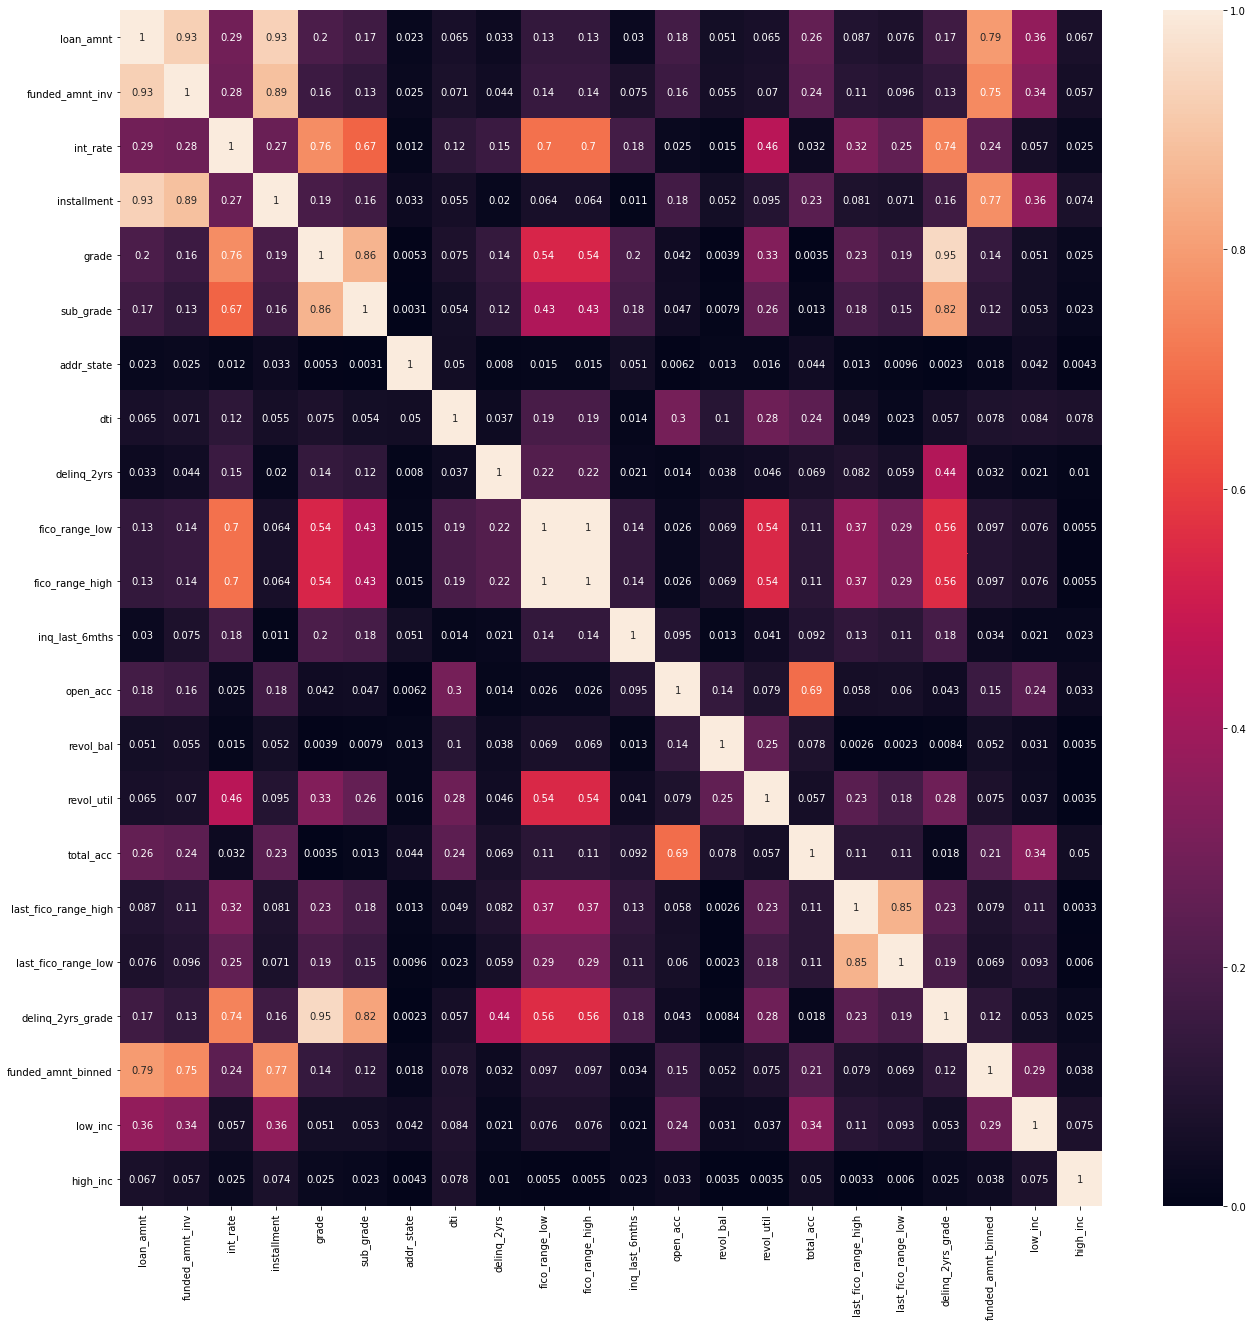

In [ ]:
plt.figure(figsize=(22, 22))
pearson_corr=pd.DataFrame(lending_club_loans_dataset.corr(method='pearson').abs())
pearson_heatmap=sns.heatmap(pearson_corr,vmin=0, vmax=1,annot=True)

Since The Graph is symetric about diagonal we can reduce it to a lower triangular matrix.

Here use the absolute values for correlation as they are redundant as the positively correlated ones.

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

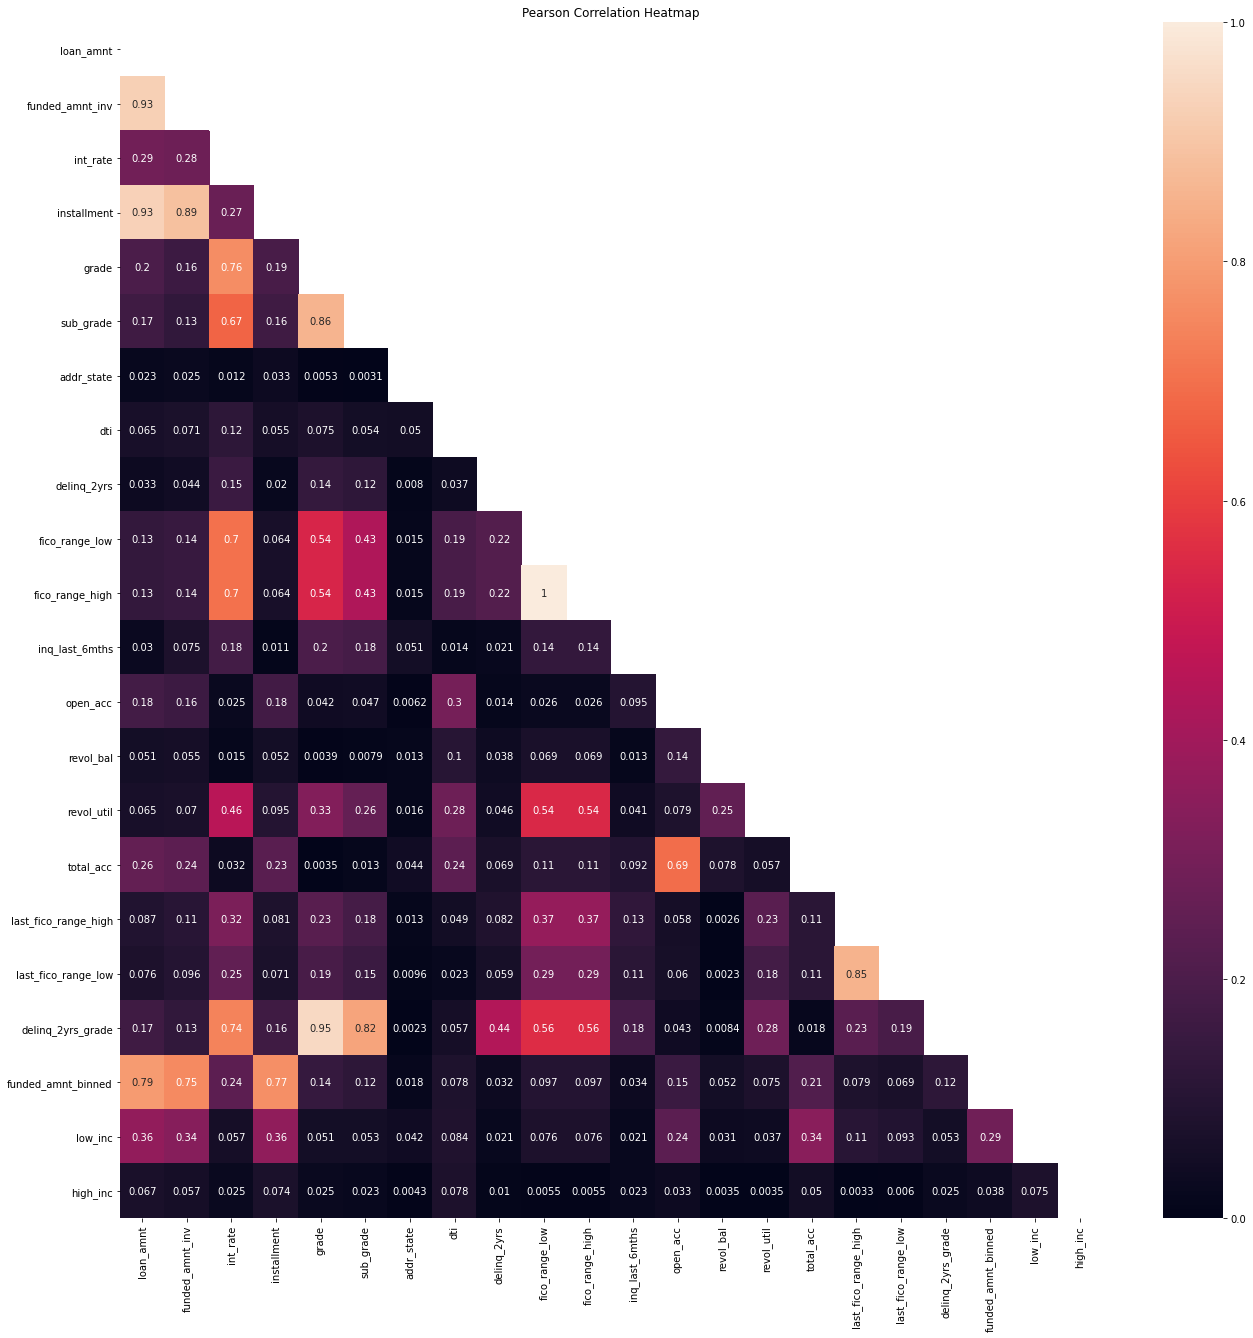

In [ ]:
plt.figure(figsize=(22, 22))
pearson_corr=pd.DataFrame(lending_club_loans_dataset.corr(method='pearson').abs())
pearson_heatmap=sns.heatmap(pearson_corr,vmin=0, vmax=1,annot=True,mask=np.triu(np.ones_like(pearson_corr,dtype=bool)))
pearson_heatmap.set_title('Pearson Correlation Heatmap')

## Spearman Correlation

Text(0.5, 1.0, 'Spearman Correlation Heatmap')

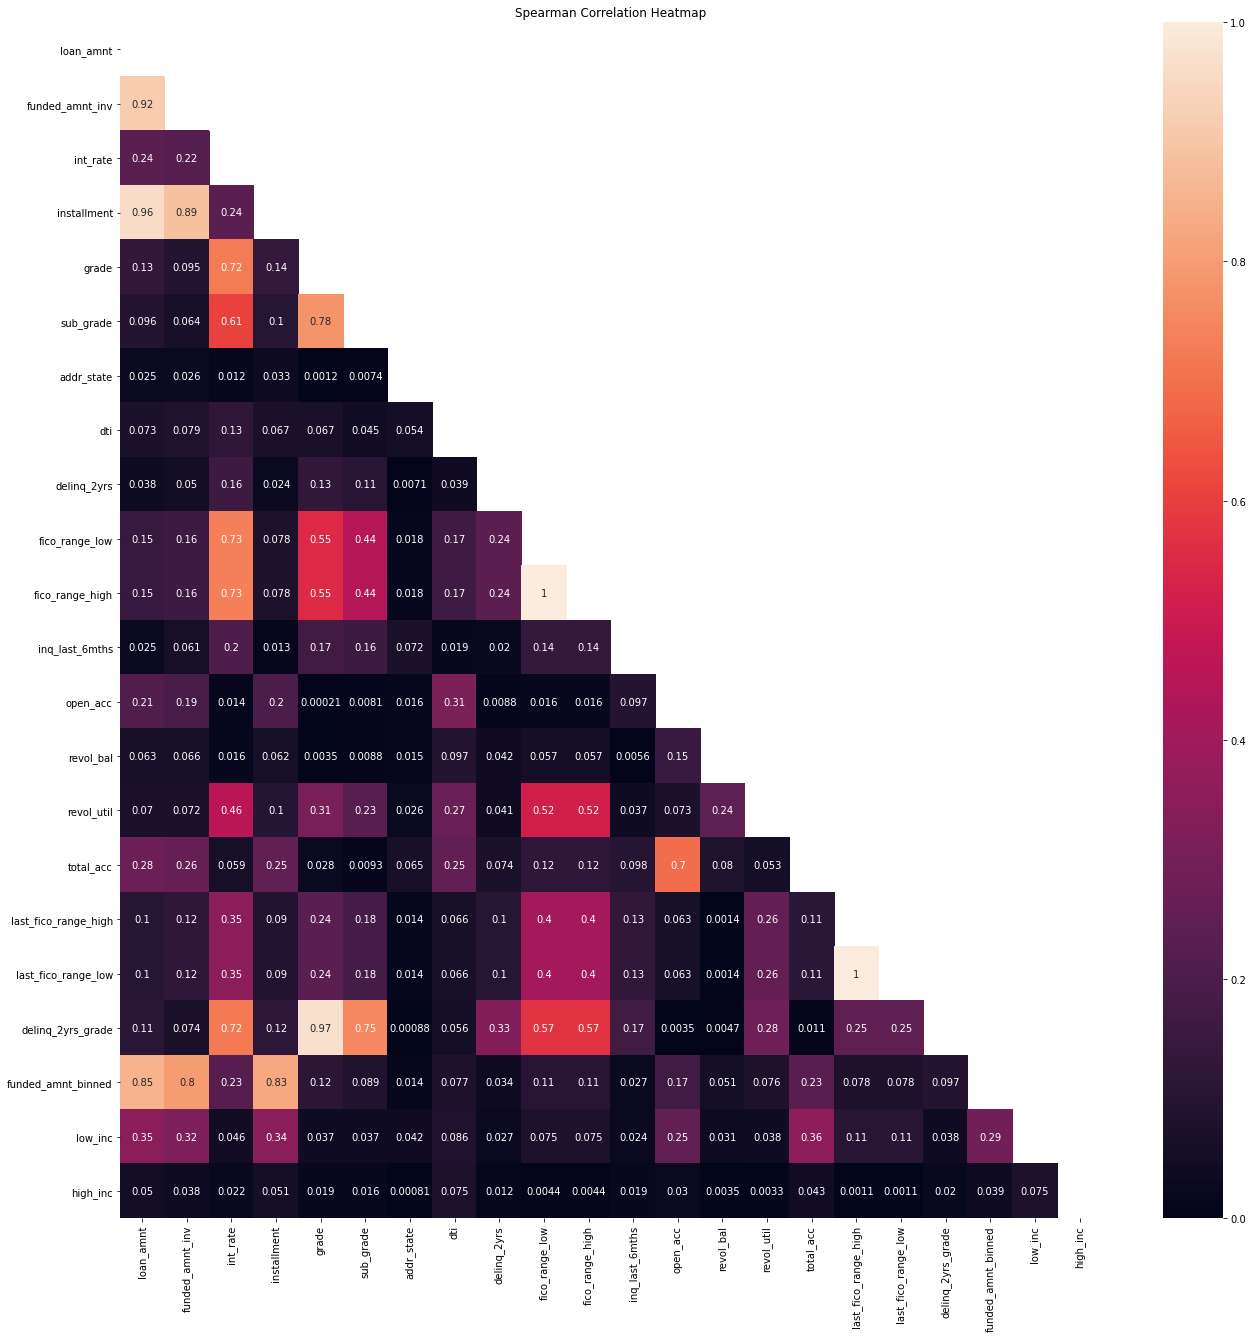

In [ ]:
plt.figure(figsize=(22, 22))
spearman_corr=pd.DataFrame(lending_club_loans_dataset.corr(method='spearman').abs())
spearman_heatmap=sns.heatmap(spearman_corr,vmin=0, vmax=1,annot=True,mask=np.triu(np.ones_like(spearman_corr,dtype=bool)))
spearman_heatmap.set_title('Spearman Correlation Heatmap')

Here we use spearman correlation values to remove columns as it is able to find the non linear relationships, yielding a much higher value of correlation,Moreover the correlation values of spearman and pearson are quite similar as columns having a linear correlation tend to also have some non linearity

The Threshhold of correlation is set to 0.85 to remove highly correlated values corresponding to spearman correlation

In [ ]:
def remove_cols(Correlation,thresh=0.85):
    cols=[]
    for i in Correlation.columns:
        for j in range(Correlation.columns.get_loc(i)):
            if Correlation[i][j]>=thresh:
                cols.append(i)
                print('removed {}'.format(i))
                break
    return cols

In [ ]:
cols=remove_cols(spearman_corr)

removed funded_amnt_inv
removed installment
removed fico_range_high
removed last_fico_range_low
removed delinq_2yrs_grade
removed funded_amnt_binned


In [ ]:
lending_club_loans_dataset.drop(cols,axis=1,inplace=True)

Text(0.5, 1.0, 'Spearman Correlation Heatmap')

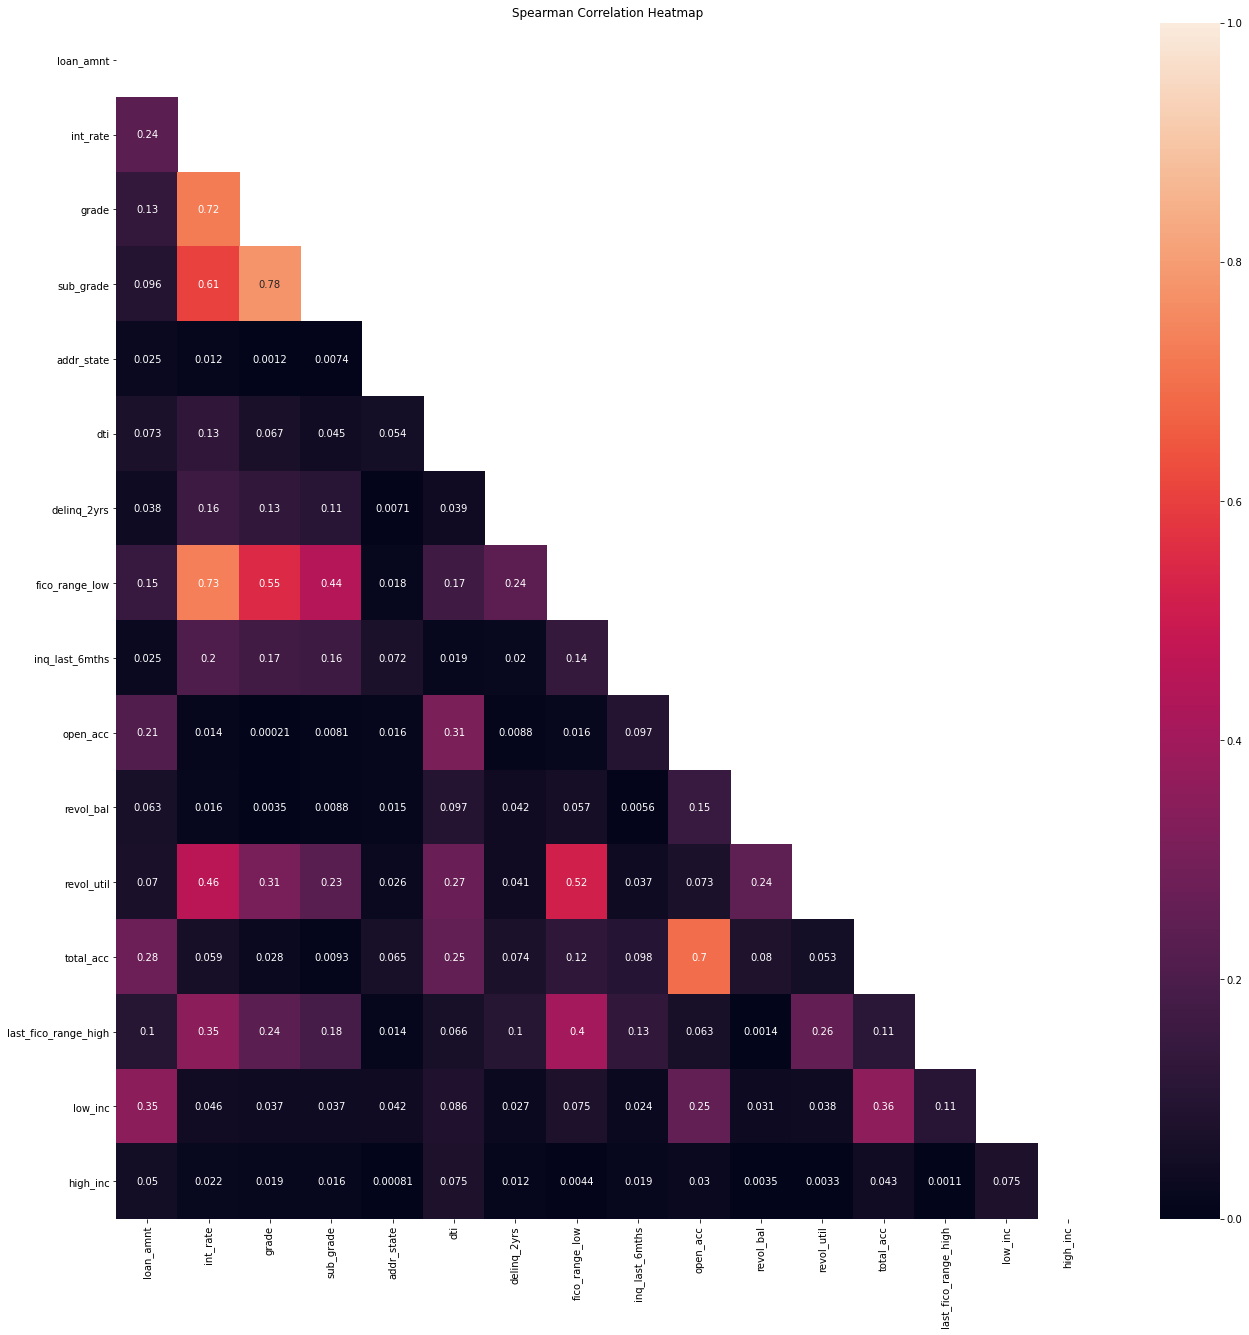

In [ ]:
plt.figure(figsize=(22, 22))
spearman_corr=pd.DataFrame(lending_club_loans_dataset.corr(method='spearman').abs())
spearman_heatmap=sns.heatmap(spearman_corr,vmin=0, vmax=1,annot=True,mask=np.triu(np.ones_like(spearman_corr,dtype=bool)))
spearman_heatmap.set_title('Spearman Correlation Heatmap')

# Outlier

## **Outlier Detection**

In [ ]:
lending_club_loans_dataset.drop(['id'],inplace=True,axis=1)

Boxplot of column loan_amnt before treatment:


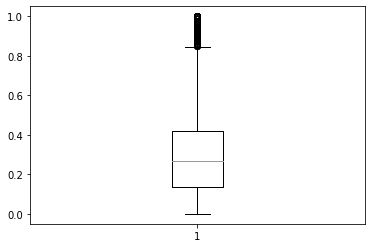

Boxplot of column int_rate before treatment:


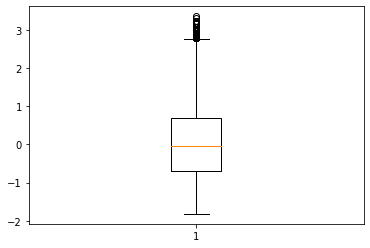

Boxplot of column grade before treatment:


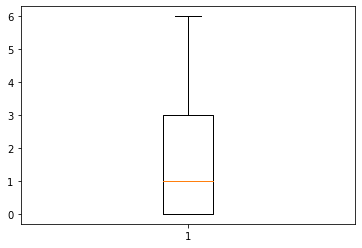

Boxplot of column sub_grade before treatment:


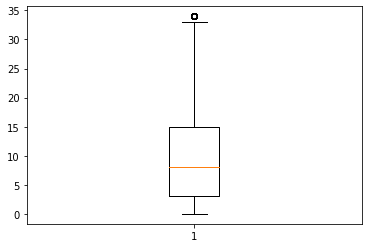

Boxplot of column addr_state before treatment:


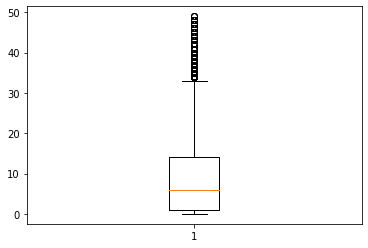

Boxplot of column dti before treatment:


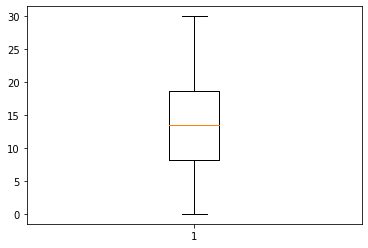

Boxplot of column delinq_2yrs before treatment:


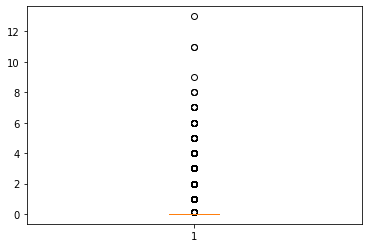

Boxplot of column fico_range_low before treatment:


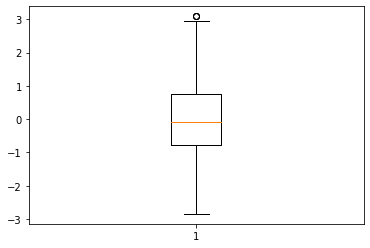

Boxplot of column inq_last_6mths before treatment:


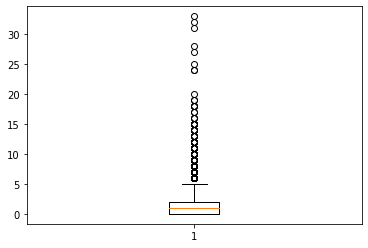

Boxplot of column open_acc before treatment:


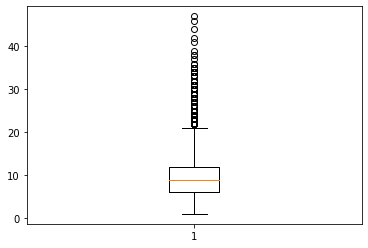

Boxplot of column revol_bal before treatment:


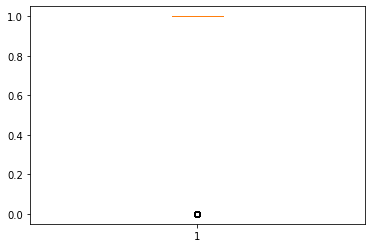

Boxplot of column revol_util before treatment:


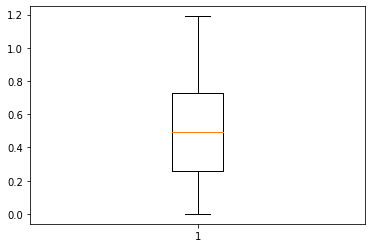

Boxplot of column total_acc before treatment:


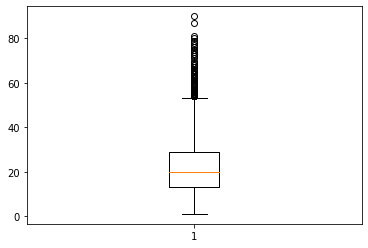

Boxplot of column last_fico_range_high before treatment:


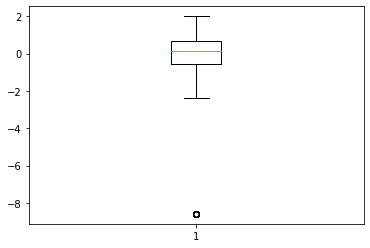

Boxplot of column low_inc before treatment:


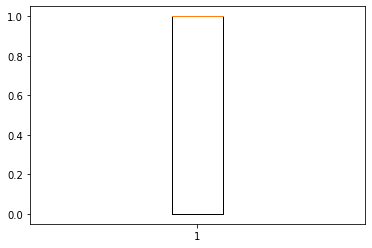

Boxplot of column high_inc before treatment:


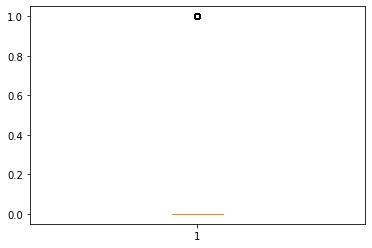

In [ ]:
for i in lending_club_loans_dataset.columns:
  print("Boxplot of column "+i+" before treatment:")
  plt.boxplot(lending_club_loans_dataset[i])
  plt.show()

Box plots for each column are seen above. Now we need to do treatment for the columns with outliers.

## **Outlier Handling**

We are replacing the outliers with median for treatment.

In [ ]:
def treatment(treatment_columns):
  for i in treatment_columns:
    Q1 = lending_club_loans_dataset[i].quantile(0.25)
    median = lending_club_loans_dataset[i].quantile(0.50)
    Q3 = lending_club_loans_dataset[i].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + 1.5*(IQR) #Upper limit
    LL = Q1 - 1.5*(IQR) #Lower limit
    lending_club_loans_dataset[i] = np.where(lending_club_loans_dataset[i] > UL, median,lending_club_loans_dataset[i])
    lending_club_loans_dataset[i] = np.where(lending_club_loans_dataset[i] < LL, median,lending_club_loans_dataset[i])

def boxplots():
  for i in lending_club_loans_dataset.columns:
    print("Boxplot of column "+i+" after treatment:")
    plt.boxplot(lending_club_loans_dataset[i])
    plt.show()

Columns to be treated:
['int_rate', 'loan_amnt', 'sub_grade', 'addr_state', 'delinq_2yrs', 'fico_range_low', 'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc', 'last_fico_range_high', 'high_inc']
Boxplot of column loan_amnt after treatment:


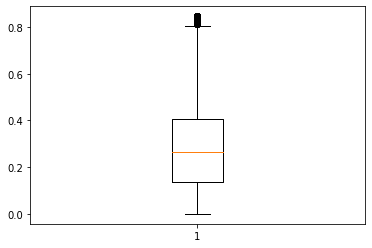

Boxplot of column int_rate after treatment:


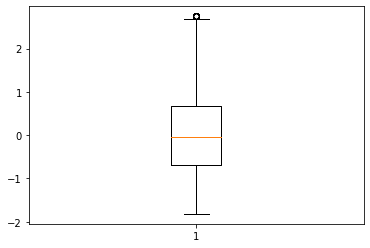

Boxplot of column grade after treatment:


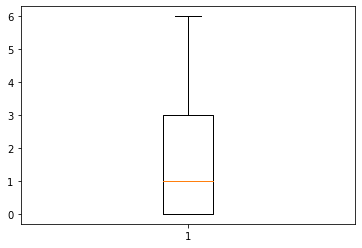

Boxplot of column sub_grade after treatment:


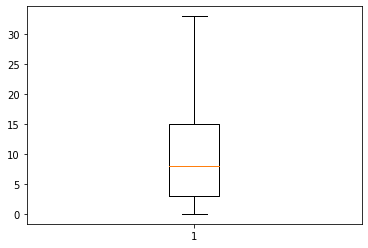

Boxplot of column addr_state after treatment:


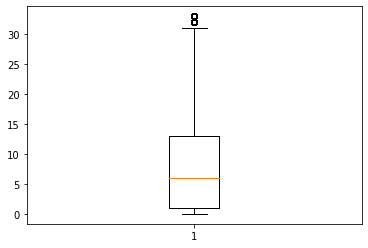

Boxplot of column dti after treatment:


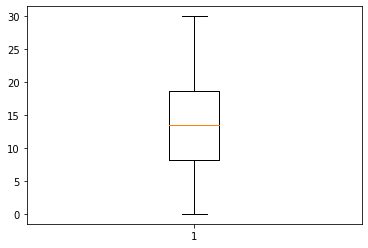

Boxplot of column delinq_2yrs after treatment:


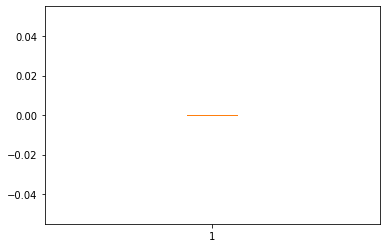

Boxplot of column fico_range_low after treatment:


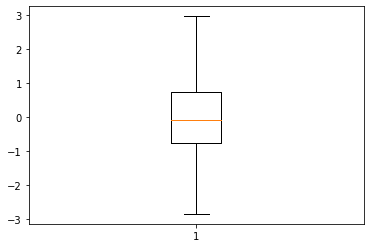

Boxplot of column inq_last_6mths after treatment:


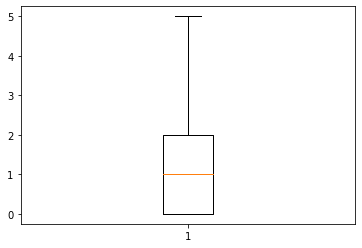

Boxplot of column open_acc after treatment:


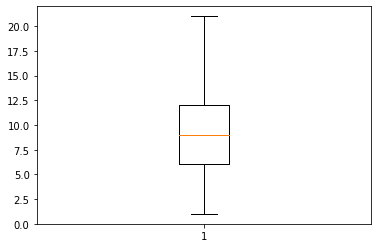

Boxplot of column revol_bal after treatment:


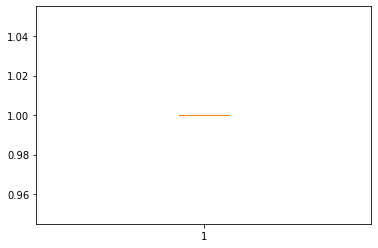

Boxplot of column revol_util after treatment:


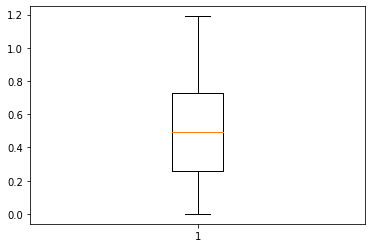

Boxplot of column total_acc after treatment:


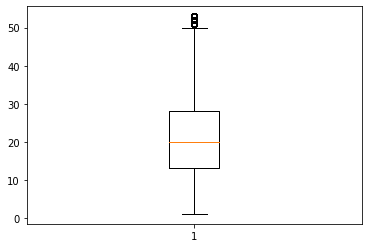

Boxplot of column last_fico_range_high after treatment:


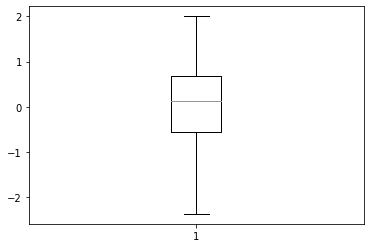

Boxplot of column low_inc after treatment:


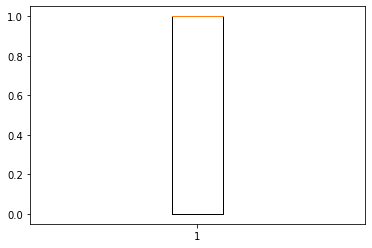

Boxplot of column high_inc after treatment:


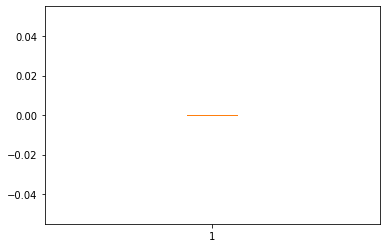

In [ ]:
treatment_columns=['int_rate','loan_amnt','sub_grade','addr_state','delinq_2yrs','fico_range_low','inq_last_6mths','open_acc','revol_bal','total_acc','last_fico_range_high','high_inc']
print("Columns to be treated:")
print(treatment_columns)
treatment(treatment_columns)
boxplots()

We can see that still few columns have outliers. So we are doing  retreatment for the outliers.

Final boxplots after retreatment:
Boxplot of column loan_amnt after treatment:


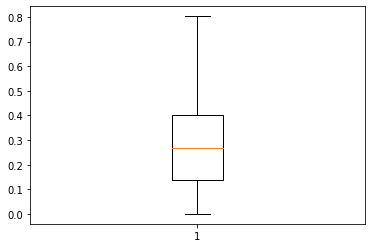

Boxplot of column int_rate after treatment:


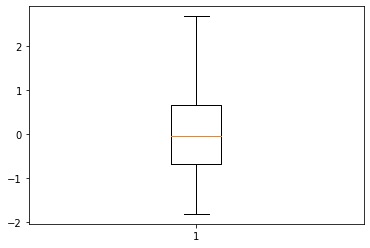

Boxplot of column grade after treatment:


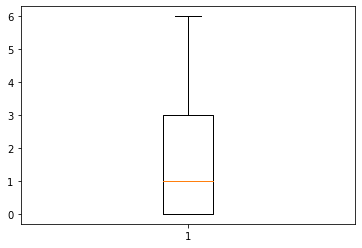

Boxplot of column sub_grade after treatment:


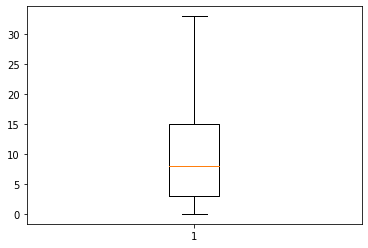

Boxplot of column addr_state after treatment:


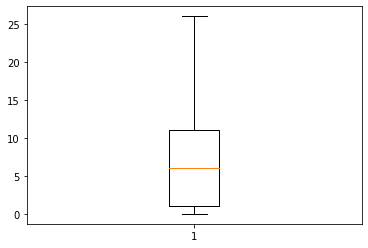

Boxplot of column dti after treatment:


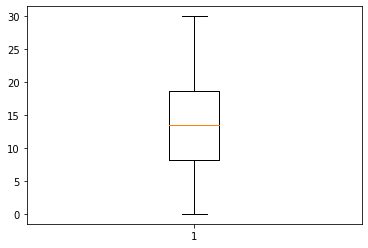

Boxplot of column delinq_2yrs after treatment:


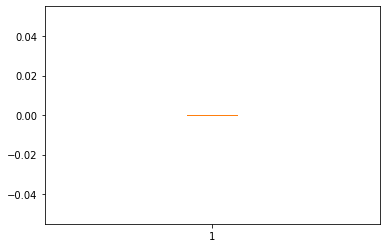

Boxplot of column fico_range_low after treatment:


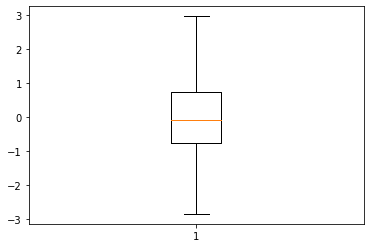

Boxplot of column inq_last_6mths after treatment:


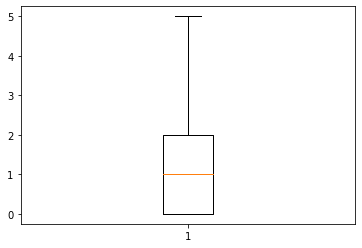

Boxplot of column open_acc after treatment:


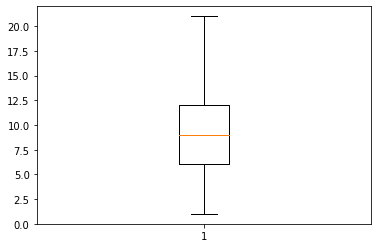

Boxplot of column revol_bal after treatment:


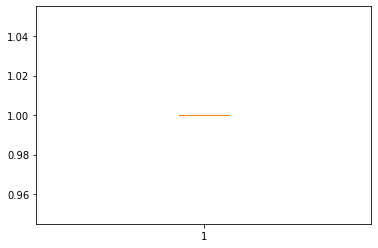

Boxplot of column revol_util after treatment:


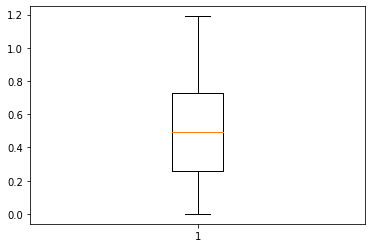

Boxplot of column total_acc after treatment:


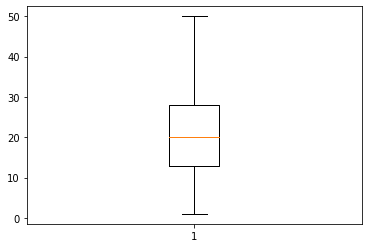

Boxplot of column last_fico_range_high after treatment:


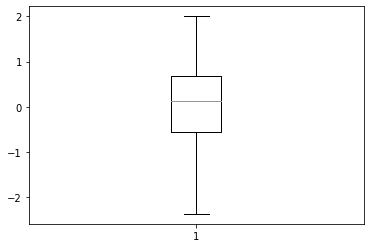

Boxplot of column low_inc after treatment:


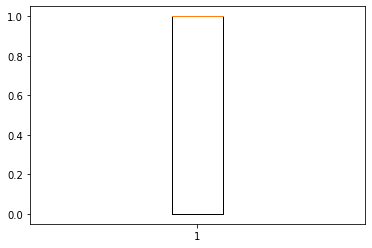

Boxplot of column high_inc after treatment:


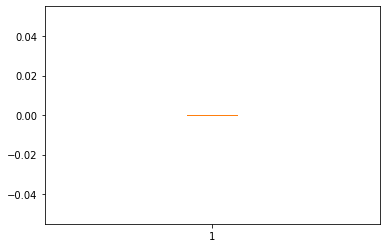

In [ ]:
for i in range(4):
  treatment(treatment_columns)
print("Final boxplots after retreatment:")
boxplots()

So outliers are handled

# **Dimensionality Reduction**


In [ ]:
scaler = preprocessing.StandardScaler()
lending_club_loans_dataset = pd.DataFrame(scaler.fit_transform(lending_club_loans_dataset))


In [ ]:
lending_club_loans_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.852675,-0.405174,-1.094570,-0.329060,0.719306,2.122578,0.0,0.606913,0.035468,-1.507540,0.0,1.220546,-1.191909,0.697604,0.918899,0.0
1,-1.248161,0.855937,0.257589,0.469678,-0.005913,-1.839520,0.0,0.745127,3.480587,-1.507540,0.0,-1.401753,-1.675618,-2.463341,0.918899,0.0
2,-1.263981,1.044284,0.257589,0.735924,-0.296000,-0.691775,0.0,0.606913,0.896748,-1.754168,0.0,1.742888,-1.095167,0.375059,0.918899,0.0
3,-0.061704,0.370054,0.257589,-0.595306,-1.021219,0.985240,0.0,-0.637012,0.035468,0.218854,0.0,-0.992350,1.516859,-1.108650,0.918899,0.0
4,-1.169064,0.151680,-1.094570,-0.994675,2.459831,0.678977,0.0,-0.498798,-0.825811,1.451994,0.0,0.168803,1.613601,0.052513,-1.088258,0.0


Here we initalise PCA function with components=None to get as many axis as possible 

In [ ]:
pca=PCA(n_components=None)
lending_club_loan_dataset_reduced= pd.DataFrame(pca.fit_transform(lending_club_loans_dataset))


Here we plot the graph of Pricipal component axis vs Variance ratio


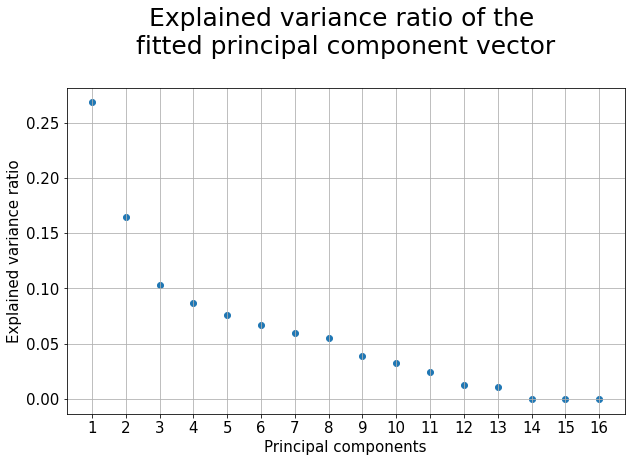

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_)
plt.grid(True)
plt.title("Variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Variance ratio",fontsize=15)
plt.show()

Graph of number of pricipal components vs Cumulative sum of variance is plotted


Text(0, 0.5, 'cumulative variance')

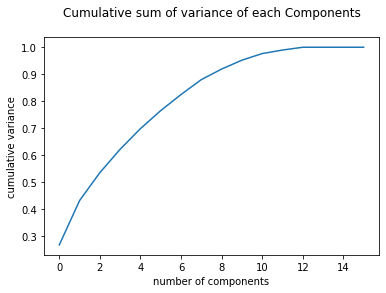

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative sum of variance of each Components\n")
plt.xlabel('number of components')
plt.ylabel('cumulative variance')

Setting a threshold of 0.99 and removing remaining columns when the threshold is reached

In [ ]:
sum=0
index=0
PCA_thresh=0.99
for i in pca.explained_variance_ratio_:
  if (sum<PCA_thresh):
    sum=sum+i
    index=index+1
print(index)
print(sum)
print(lending_club_loan_dataset_reduced)

13
0.9999999999999998
             0         1         2   ...            13            14   15
0     -0.641637 -1.547297 -1.805064  ... -1.371727e-17 -2.502504e-18 -0.0
1      0.662637 -3.010541  1.088201  ... -4.125519e-17 -4.106252e-18 -0.0
2      1.106940 -2.350664  0.394499  ... -3.431536e-17 -2.369572e-18  0.0
3      0.325543  0.592360 -1.289330  ...  6.044058e-17  3.915719e-19  0.0
4     -0.754496  1.754674 -1.925594  ... -4.207332e-17 -3.793900e-18 -0.0
...         ...       ...       ...  ...           ...           ...  ...
42530 -0.560114  0.139469  0.439199  ...  1.919690e-18 -7.133837e-21 -0.0
42531 -1.389397 -0.860644 -0.986338  ...  8.474013e-20 -1.227114e-20 -0.0
42532 -1.567000 -0.143275 -0.280355  ...  1.024301e-18 -1.298029e-20  0.0
42533 -1.658781  0.000404  0.914265  ...  1.252128e-18  3.897970e-20  0.0
42534 -1.927092  0.385323  0.739115  ... -7.015444e-20 -3.124504e-20 -0.0

[42535 rows x 16 columns]


In [ ]:
lending_club_loan_dataset_reduced=lending_club_loan_dataset_reduced.drop([i for i in range(index,len(pca.explained_variance_ratio_))],axis=1)

In [ ]:
lending_club_loan_dataset_reduced.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.641637,-1.547297,-1.805064,-0.735435,1.322715,0.155592,1.656339,-0.981413,1.234465,0.236217,-0.048146,-0.357035,-0.556013
1,0.662637,-3.010541,1.088201,3.829904,-1.759932,-1.125593,0.852241,0.951644,0.561801,0.203043,-0.151982,-0.891873,-0.249643
2,1.106940,-2.350664,0.394499,0.140173,-0.013132,0.133803,0.851710,-1.339316,0.126875,1.469068,-0.214743,-1.204549,-0.446322
3,0.325543,0.592360,-1.289330,0.238564,-1.251245,0.604496,-0.102440,1.312680,-0.098693,-0.036063,1.521956,0.113121,0.456204
4,-0.754496,1.754674,-1.925594,0.422454,1.638569,-1.222089,-1.891527,-0.793835,-0.225294,-0.565895,0.549452,-0.512495,-0.301248


#**Class Imbalance**

In [ ]:
X = lending_club_loan_dataset_reduced
y = target_column
# For solving class imbalance

counter=Counter(target_column)
print('before',counter)
oversample = RandomOverSampler(random_state = 2)
X, target_column = oversample.fit_resample(X, target_column.ravel())
counter=Counter(target_column)
print('after',counter)
#from now on you should forget about X and y(target_column) have to use X_trainsm and y_trainsm for further purposes

before Counter({0: 33586, 1: 5653, 2: 1988, 3: 761, 4: 513, 5: 16, 6: 12, 7: 5, 8: 1})
after Counter({0: 33586, 1: 33586, 4: 33586, 5: 33586, 6: 33586, 7: 33586, 8: 33586, 2: 33586, 3: 33586})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
